# PHASE 2: Visualization

### 0. INTRODUCTION

For data visualization we work with matplotlib and seaborn libraries.

### 1. LIBRARY IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

### 2. DATA LOAD

The following dataframe generated in pandas and loaded through a csv file called data_vuelos_completo.csv is declared in the relative path "../data/data_vuelos_completo.csv", where the categorical and numerical variables are contained

In [2]:
df= pd.read_csv("../data/data_vuelos_completo.csv")
df.shape

(2484634, 18)

Variables that are not necessary for the analysis are eliminated

In [3]:
df.drop(["CAPTURA", "FUENTE", "fecha_llegada_ida", "hora_llegada_ida", "fecha_llegada_vuelta", "hora_llegada_vuelta"],axis=1, inplace=True)

#### 3. RESULTS VISUALIZATION AND INTERPRETATION

Given the information nature, histograms and bar charts are chosen to effectively display the results

#### 3.1 Price Distribution

In this first histogram the flight prices distribution is represented. Outliers are not being taken into account

In [4]:
df_sin_outliers = df[df["PRECIO"].between(df["PRECIO"].quantile(.15), df["PRECIO"].quantile(.85))]

C:\Users\Daceman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


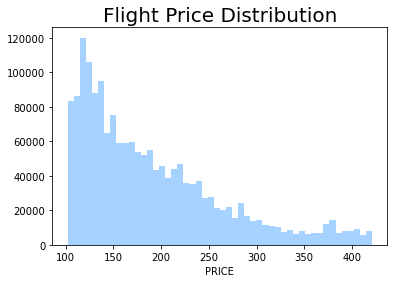

In [5]:
sns.distplot(df_sin_outliers["PRECIO"], color= "dodgerblue", kde=False).set_title('Flight Price Distribution', fontsize=20)
plt.xlabel("PRICE")
plt.show()

It can be seen that the highest density of flights is between 100 & 180 euros

#### 3.2 Flight Price Pattern

The information of only one airport is analyzed so it is filtered by the origin Madrid

In [6]:
df_mad_sin_outliers=df_sin_outliers[df_sin_outliers["ORIGEN"]=="MAD"]

In [7]:
df_mad=df[df["ORIGEN"]=="MAD"]

A categorical division is made between short (<1100km) and long flights (>1100km)

In [8]:
cortos=df_mad[df_mad["distancia"]<=1100]
largos=df_mad_sin_outliers[df_mad_sin_outliers["distancia"]>1100]
cortos["Tipo Vuelo"]="corto"
largos["Tipo Vuelo"]="largo"
df_tipovuelo=pd.concat([cortos, largos])

<ipython-input-8-47e81839f2ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cortos["Tipo Vuelo"]="corto"
<ipython-input-8-47e81839f2ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  largos["Tipo Vuelo"]="largo"


#### Average price per hectokilometer

In [9]:
df_mad['hkmEUR'].mean()

13.897495510693112

#### 3.3 Media de precio por hectokilometro según aerolinea para vuelos cortos

#### Short flights average price

Flights with incoherent prices are located so they are eliminated

In [10]:
cortos.drop((cortos[cortos['AEROLINEA']=='Aeromexico']).index, inplace=True)

C:\Users\Daceman\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
cortos["hkmEUR"].mean()

26.678419187621046

In [12]:
dfaerohkm=cortos.groupby('AEROLINEA')["hkmEUR"].mean().sort_values()
dfaerohkm

AEROLINEA
LaudaMotion                8.114167
Ryanair                   11.468151
Swiss                     13.172105
Air Malta                 15.233061
Transavia France          16.293020
Involatus                 16.993378
TAP Air Portugal          17.675427
Brussels Airlines         18.843188
Lufthansa                 18.879439
Austrian Airlines         20.270000
Air Europa                20.335491
Alitalia                  20.428899
Blue Air                  20.663294
Aegean Airlines           20.782903
Tunisair                  21.220000
KLM                       22.453423
Pegasus Airlines          23.430833
Norwegian Air Shuttle     24.130000
Easyjet                   25.142190
Volotea                   25.589145
Wizz Air                  26.639364
SkyUp Airlines            26.861000
LOT Polish Airlines       27.180800
Air Baltic                27.990000
British Airways           29.215104
Iberia Express            30.778477
AccesRail                 31.190000
Iberia            

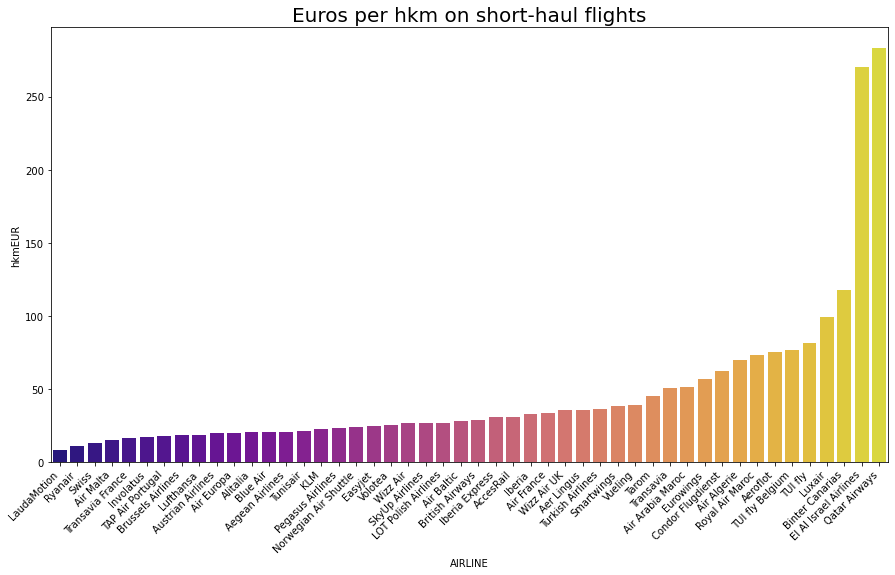

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
ax=sns.barplot(x=dfaerohkm.index, y=dfaerohkm, palette="plasma")
ax.set_title('Euros per hkm on short-haul flights',fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", )
plt.xlabel("AIRLINE")
plt.show()

You can see how there is an imbalance of prices between companies so that the top 25 companies are selected, as they have an average price per hectokilometer that is lower or slightly higher than the average

##### 3.3 Average price per hectokilometer according to airline for long flights

#### Average long haul price

In [14]:
largos["hkmEUR"].mean()

8.83035778367634

In [15]:
dfaerohkmlar=largos.groupby('AEROLINEA')["hkmEUR"].mean().sort_values()
dfaerohkmlar

AEROLINEA
LaudaMotion           4.056067
Air Arabia Maroc      4.732798
Royal Air Maroc       5.454767
Air Canada            5.920026
American Airlines     6.024283
                       ...    
Jet2                 17.956938
FlyOne               20.360000
Air Albania          20.684000
Freebird Airlines    21.000000
AccesRail            21.570000
Name: hkmEUR, Length: 85, dtype: float64

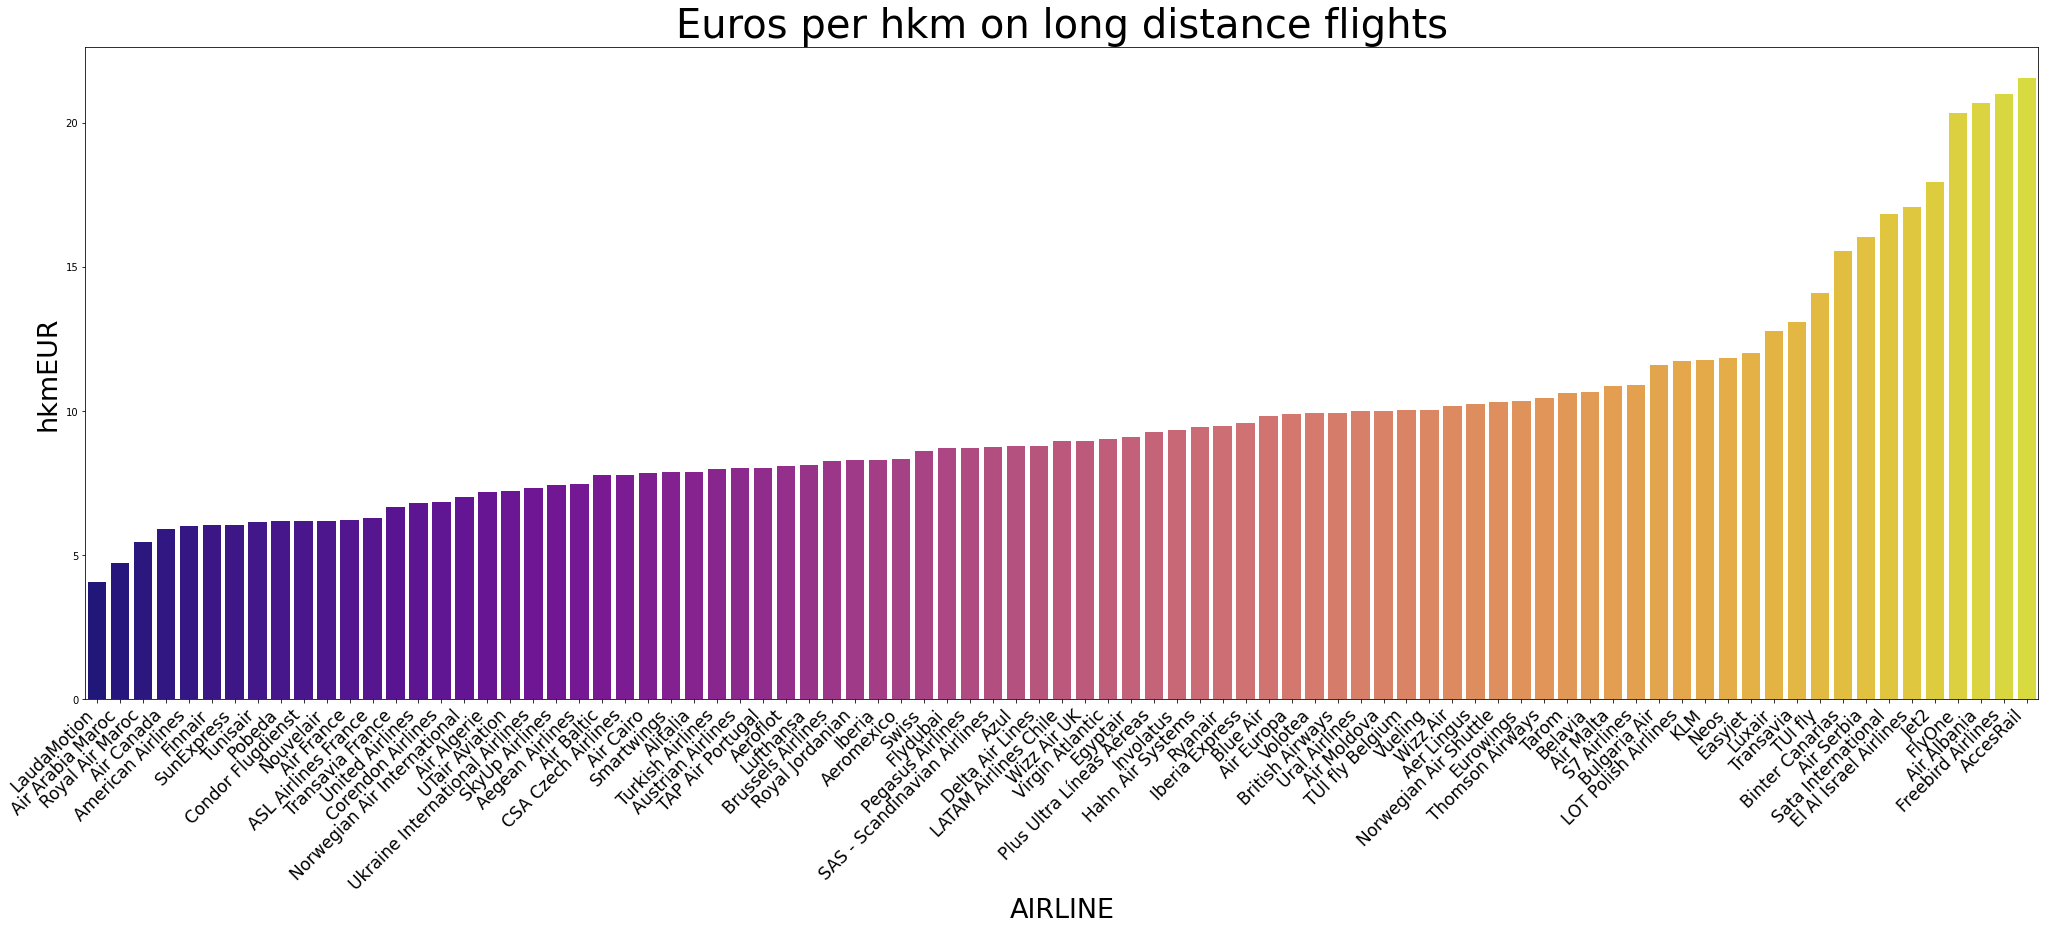

In [16]:
fig, ax = plt.subplots(figsize=(35,12))
# sns.dark_palette("winter", as_cmap=True)
ax=sns.barplot(x=dfaerohkmlar.index, y=dfaerohkmlar, palette="plasma")
ax.set_title('Euros per hkm on long distance flights',fontsize=40)
ax.set_ylabel(ax.get_ylabel(), fontsize=27)
ax.set_xlabel(ax.get_xlabel(), fontsize=27)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=17)
plt.xlabel("AIRLINE")
plt.show()

In this case, the price per hectokilometer for long flights is lower. It was decided to select the first companies up to Easyjet

#### 3.4 Cheaper destinations

For the visualization of more economical destinations, the destinations are filtered by the minimum price, to locate the destinations with their minimum prices

#### Cheaper short distance destinations

In [17]:
cordesprec=cortos.groupby('DESTINO')['PRECIO'].min().sort_values(ascending=True)
cordesprec

DESTINO
OPO     25.24
PMI     28.00
MRS     28.24
BVA     28.24
ALC     29.00
VLC     29.00
SVQ     29.00
IBZ     31.00
BOD     33.00
TLS     33.00
NTE     34.00
CAG     39.98
OVD     41.00
LIS     41.00
AGP     41.00
BIO     41.00
BCN     41.00
VGO     41.00
LCG     41.00
SCQ     43.68
BJZ     51.00
GVA     55.00
MAH     57.00
MLN     57.00
SDR     58.00
XRY     58.00
LEI     58.00
GRX     58.00
PNA     59.00
EAS     59.00
ORY     59.00
CDG     60.00
LYS     63.00
NCE     94.00
TRN    100.00
AHO    128.00
LDE    168.00
Name: PRECIO, dtype: float64

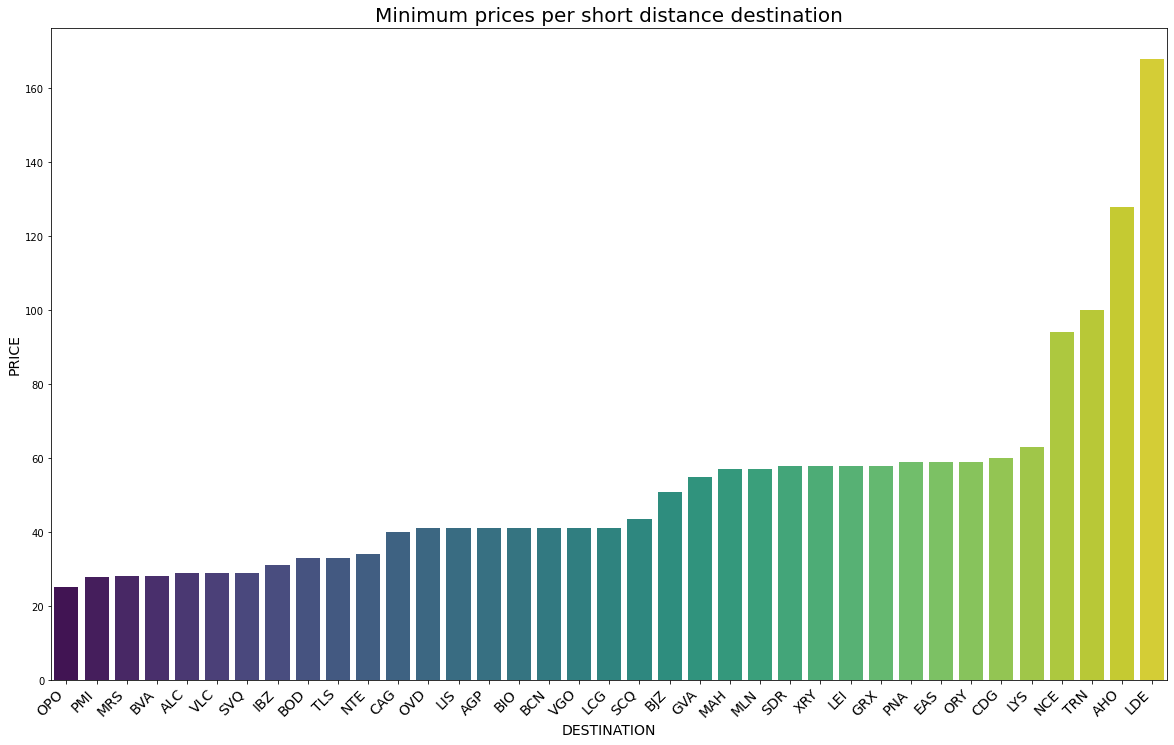

In [18]:
fig, ax = plt.subplots(figsize=(20,12))
ax=sns.barplot(x=cordesprec.index, y=cordesprec, palette="viridis")
ax.set_title('Minimum prices per short distance destination',fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=14)
plt.xlabel("DESTINATION")
plt.ylabel("PRICE")
plt.show()

It is noted that for most destinations there are prices below the average, so it was decided to divide by price range in order to reduce the search options

- Low <= 38
- 38 > Medium <= 60 
- High > 60

These ranges will be used according to the price entered by the user to filter out the appropriate destinations.

#### More economical long distance destinations

In [19]:
lardesprec=largos.groupby('DESTINO')['PRECIO'].min().sort_values(ascending=True)
lardesprec

DESTINO
ZRH    102.0
EDI    102.0
EIN    102.0
FCO    102.0
FRA    102.0
       ...  
BOG    403.0
JED    404.0
LAD    404.0
LOS    405.0
LIM    415.0
Name: PRECIO, Length: 99, dtype: float64

In [20]:
prueba = largos.groupby('DESTINO')[['DESTINO', 'PRECIO']].min().sort_values(by= 'PRECIO', ascending=True)

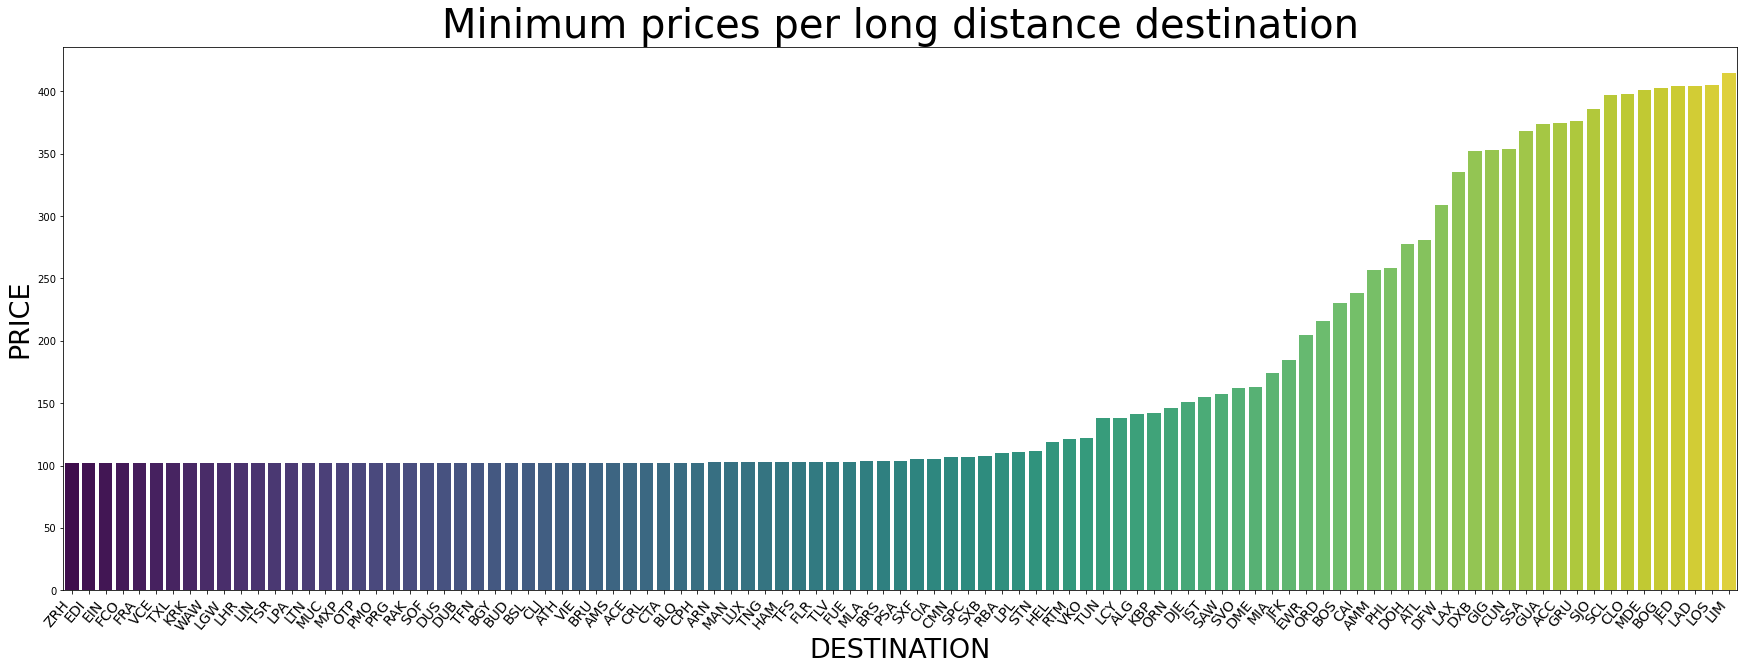

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
ax=sns.barplot(x=lardesprec.index, y=lardesprec, palette="viridis")
ax.set_title('Minimum prices per long distance destination',fontsize=40)
ax.set_ylabel(ax.get_ylabel(), fontsize=27)
ax.set_xlabel(ax.get_xlabel(), fontsize=27)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=14)
plt.xlabel("DESTINATION")
plt.ylabel("PRICE")
plt.show()

For long distance flights it is decided to divide as follows:

- Low <= 175
- 175 > Medium <= 275 
- High > 275

#### 3.5 Average prices according to the day of the week

The following graphs represent the average prices according to the weekend

#### Average prices for short-haul flights

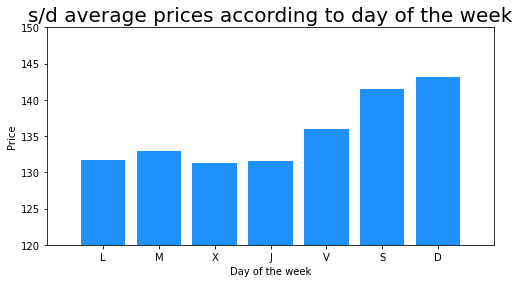

In [22]:
df_dias = cortos.groupby('dia_semana').mean()
figure = plt.figure(figsize=(8,4))
plt.bar(["L","M", "X", 'J', 'V', 'S', 'D'],df_dias['PRECIO'], color="dodgerblue")
plt.axis([-1, 7, 120, 150])
plt.title('s/d average prices according to day of the week',fontsize=20)
plt.xlabel('Day of the week')
plt.ylabel('Price')
plt.show()

You can see that the best days of the week are Wednesday, Thursday and Monday. There is a considerable increase in weekend prices

#### Average prices for short-haul flights

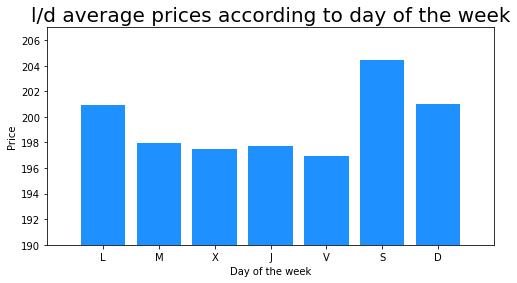

In [23]:
df_diaslar = largos.groupby('dia_semana').mean()
figure = plt.figure(figsize=(8,4))
plt.bar(["L","M", "X", 'J', 'V', 'S', 'D'],df_diaslar['PRECIO'], color="dodgerblue")
plt.axis([-1, 7, 190, 207])
plt.title('l/d average prices according to day of the week',fontsize=20)
plt.xlabel('Day of the week')
plt.ylabel('Price')
plt.show()

For long-distance flights, Fridays, Wednesdays and Thursdays are selected as the most economical days to travel

#### 3.6 Average price distribution by route and date

Finally, the price curve is analyzed according to each route over the three months for which data is available

In [24]:
df_mad_sin_outliers['fecha_salida_ida'] = df_mad_sin_outliers['fecha_salida_ida'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

<ipython-input-24-b0cbda86199a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mad_sin_outliers['fecha_salida_ida'] = df_mad_sin_outliers['fecha_salida_ida'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


<ipython-input-25-6f76503b9a0e>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize=(20,5))


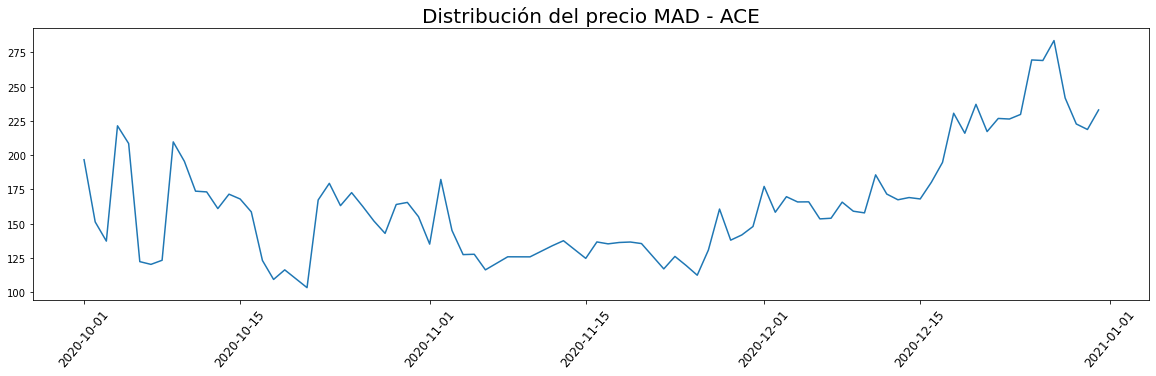

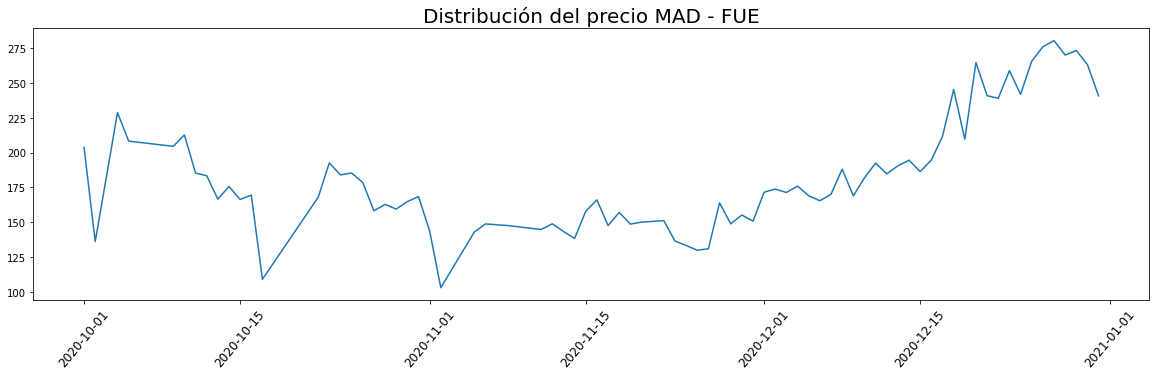

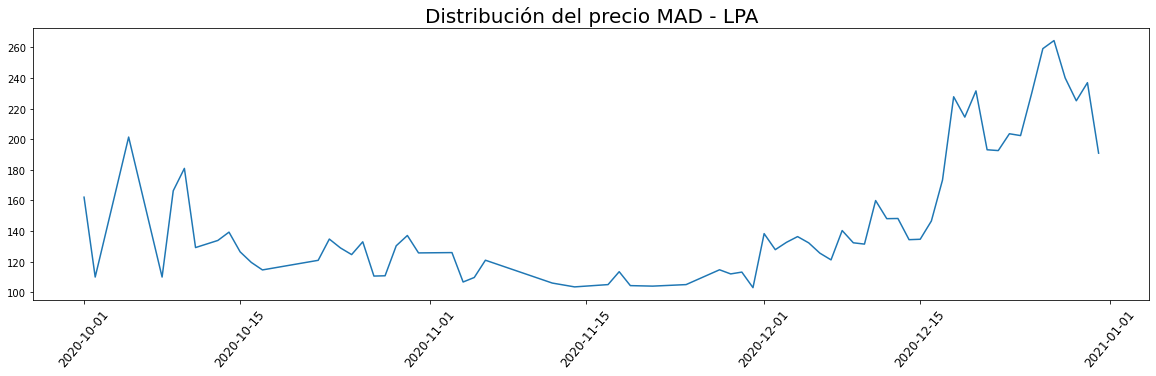

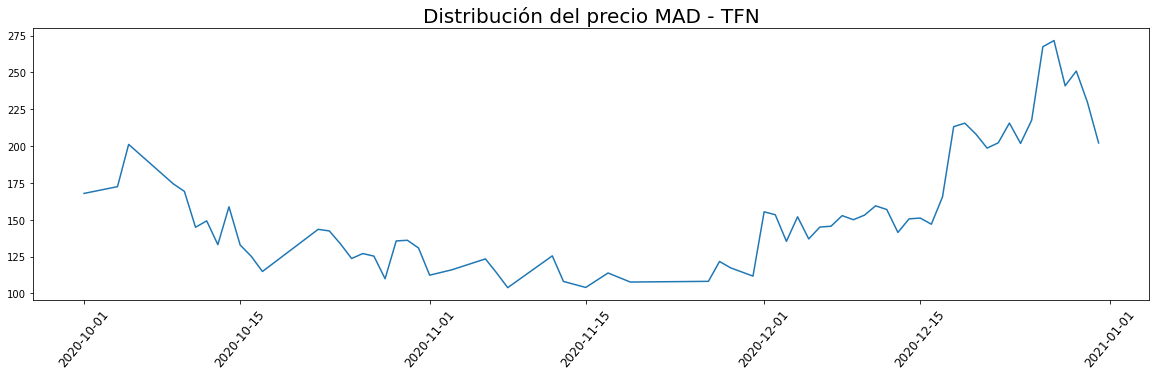

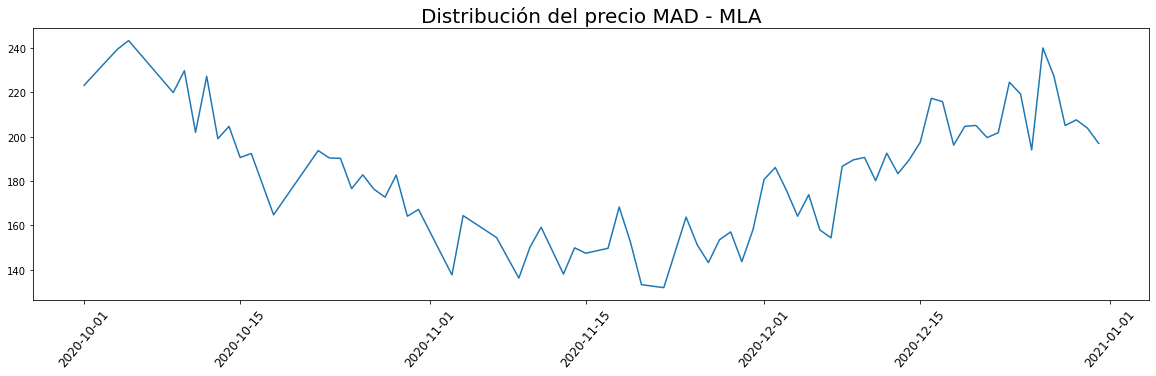

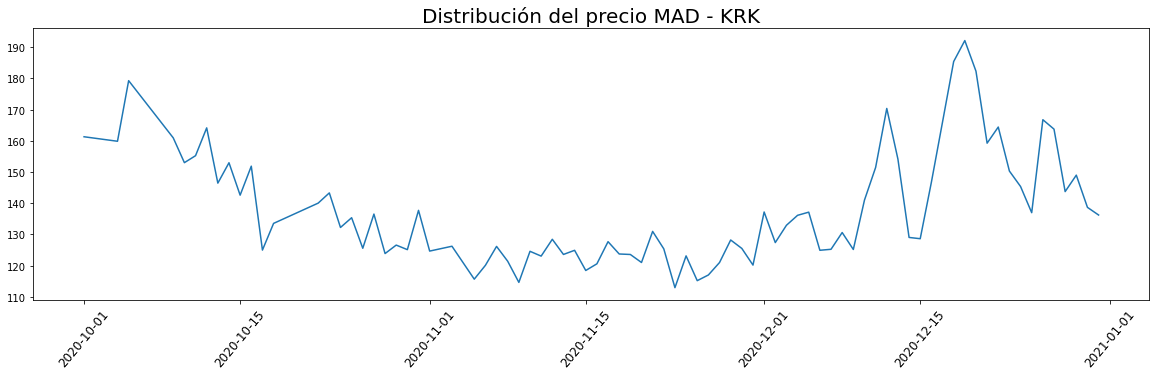

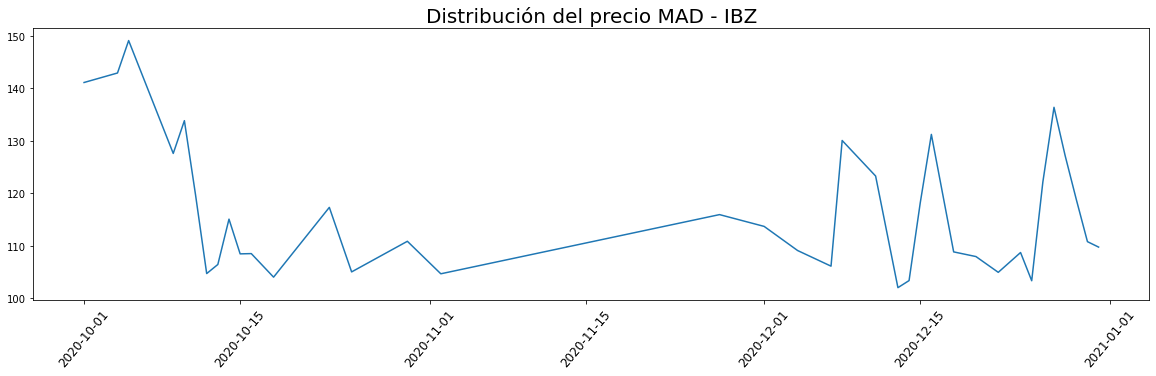

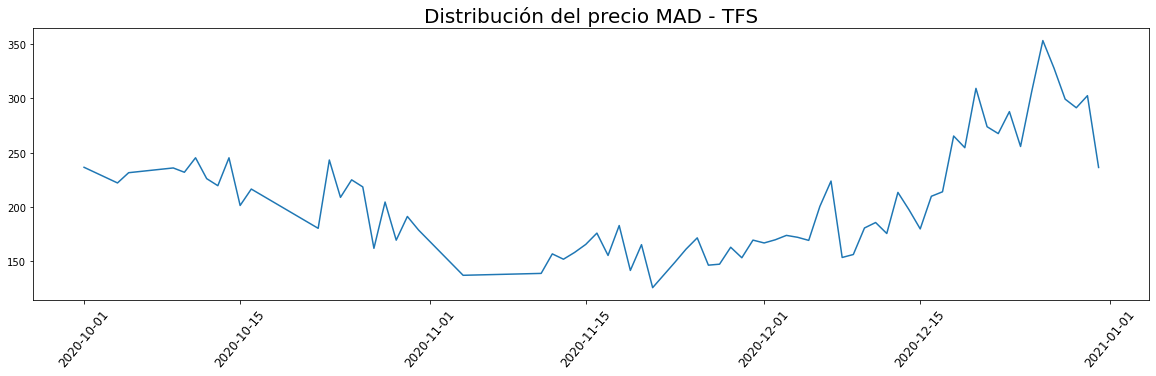

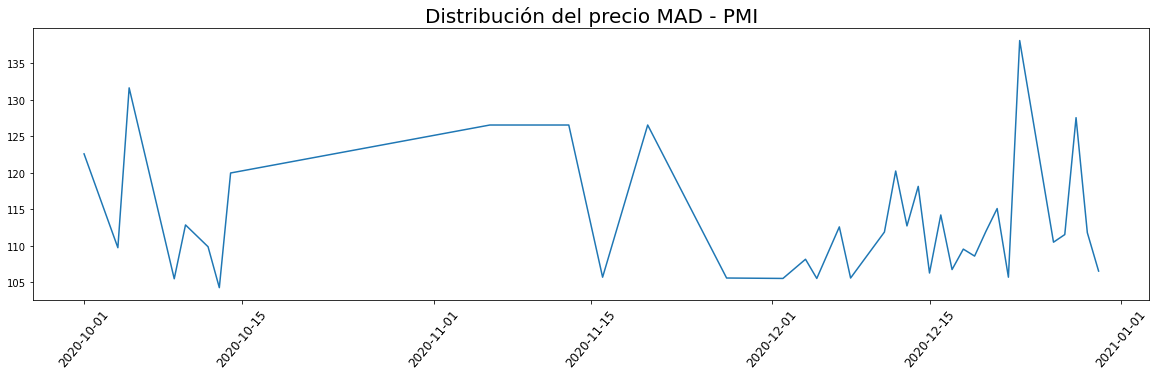

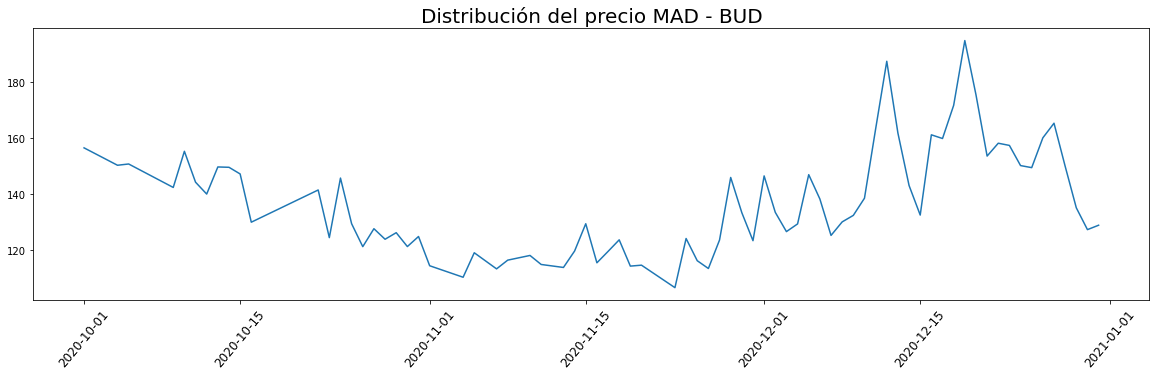

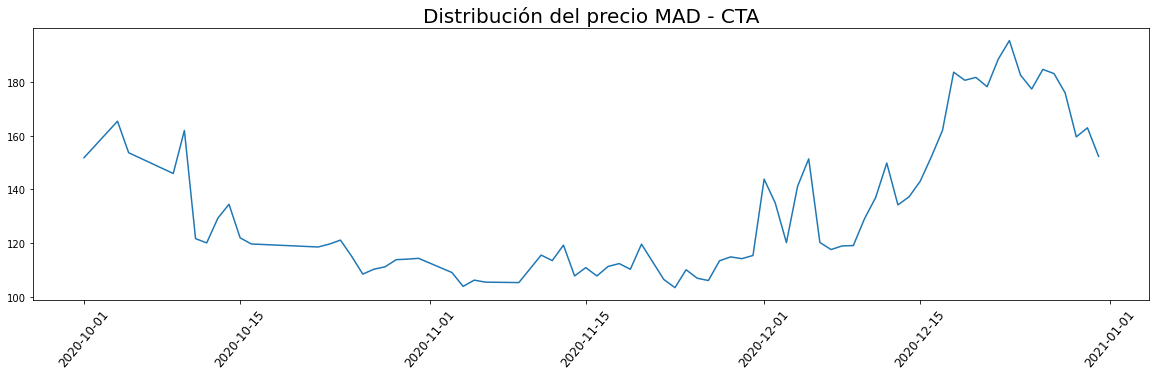

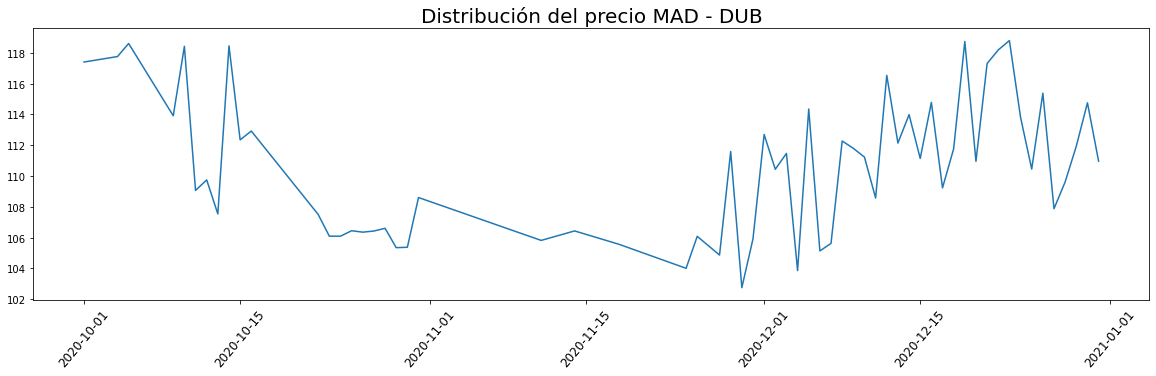

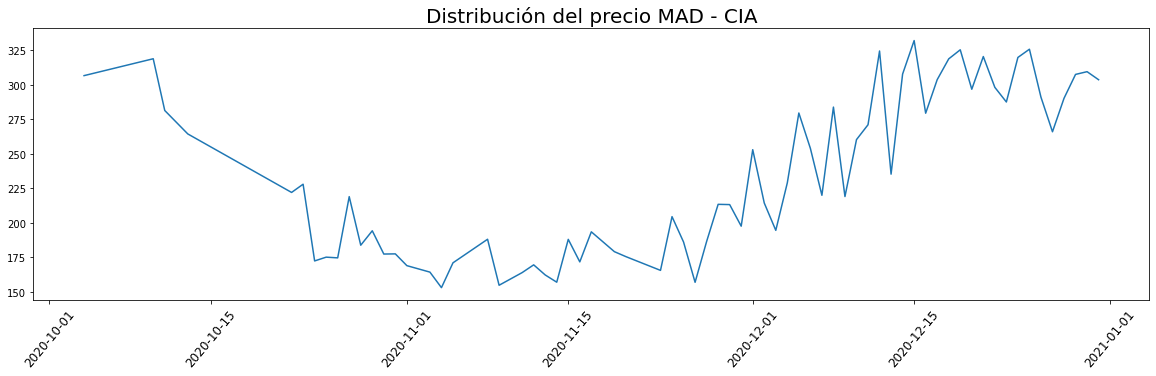

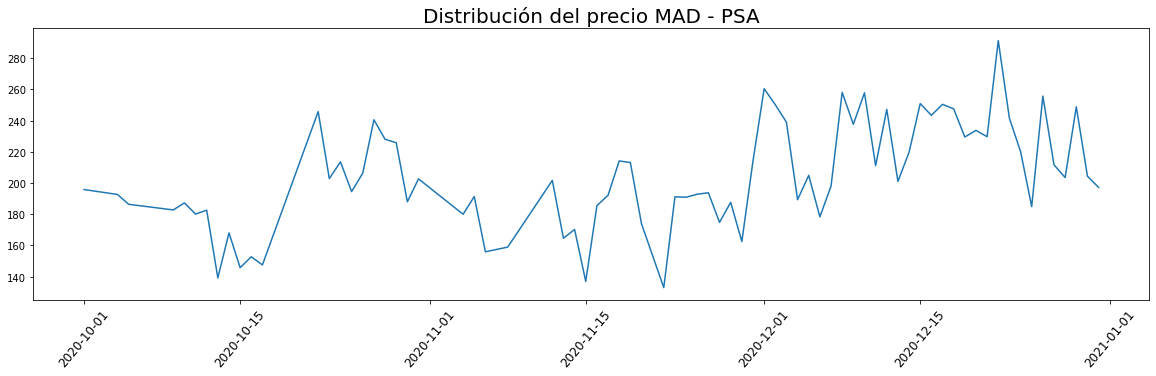

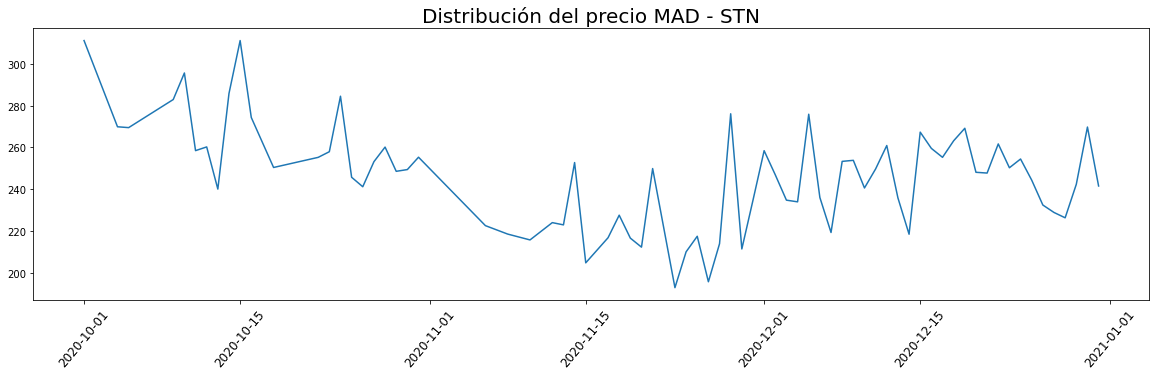

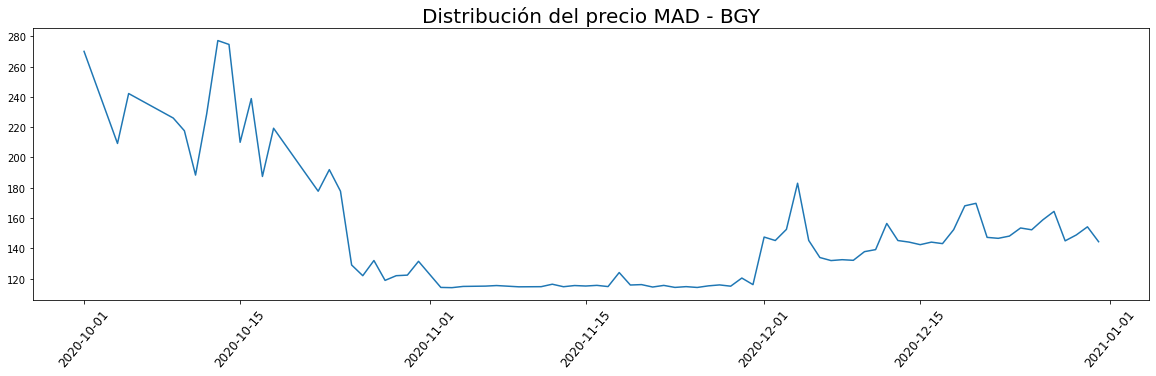

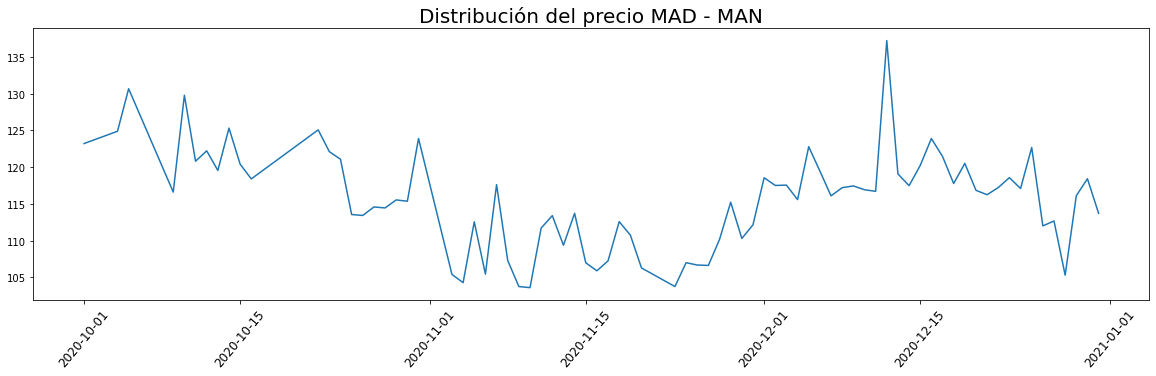

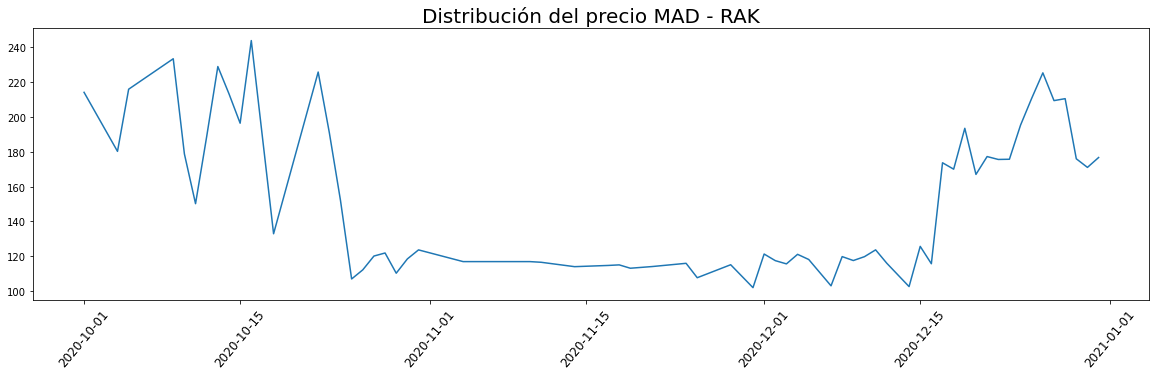

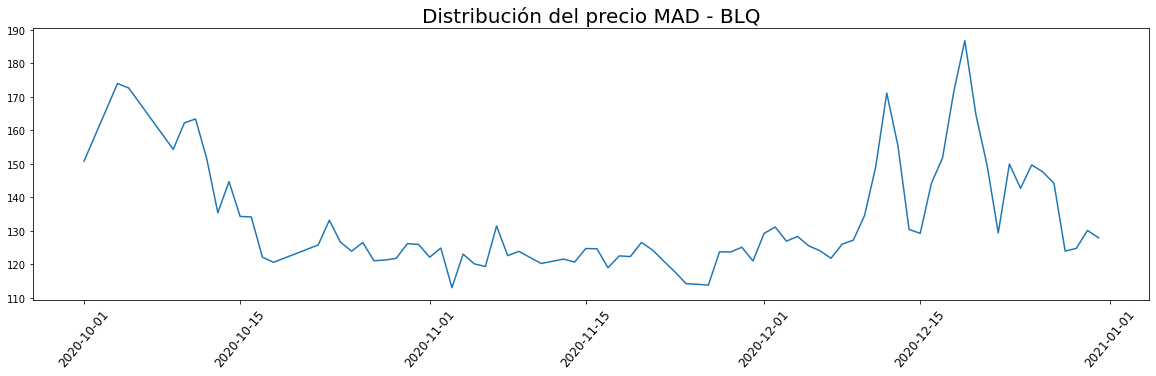

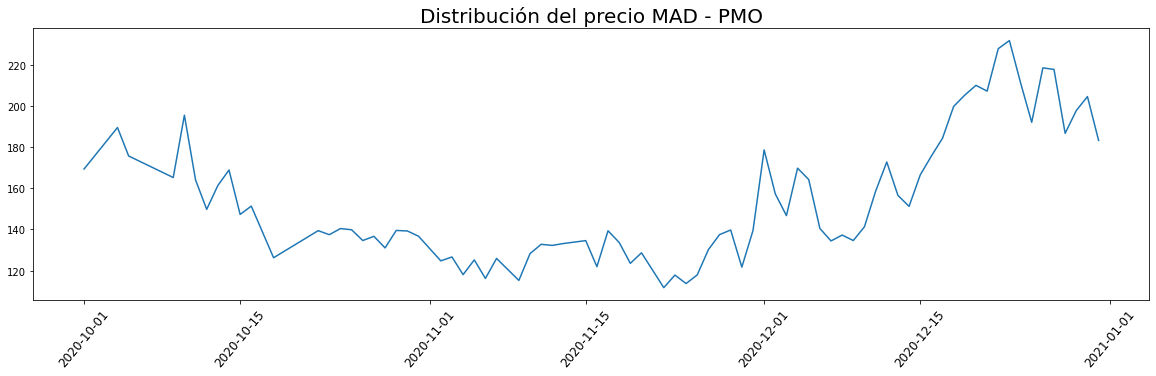

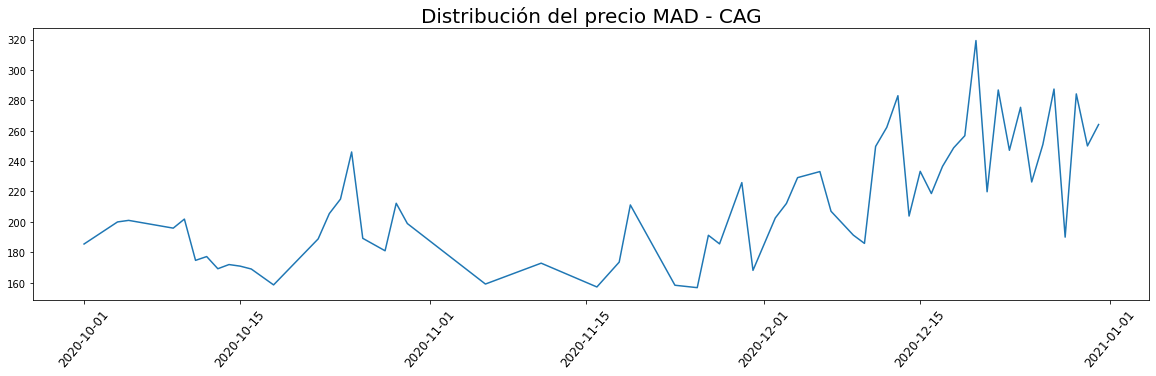

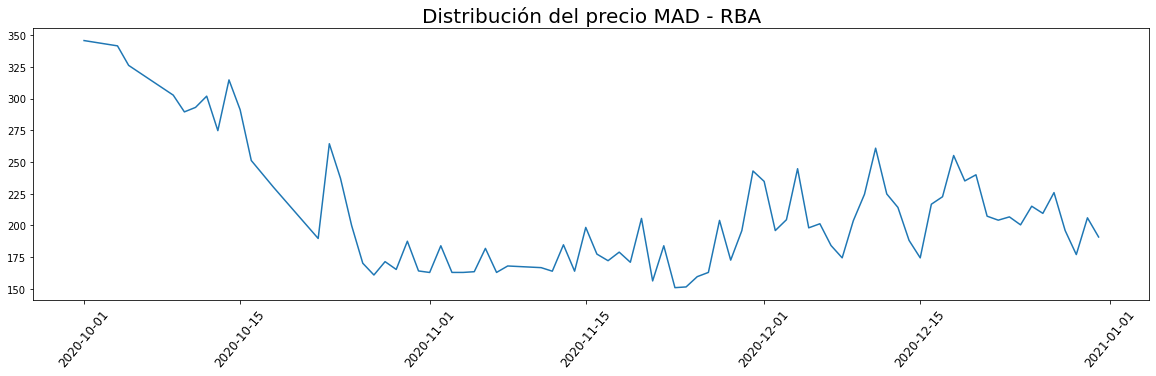

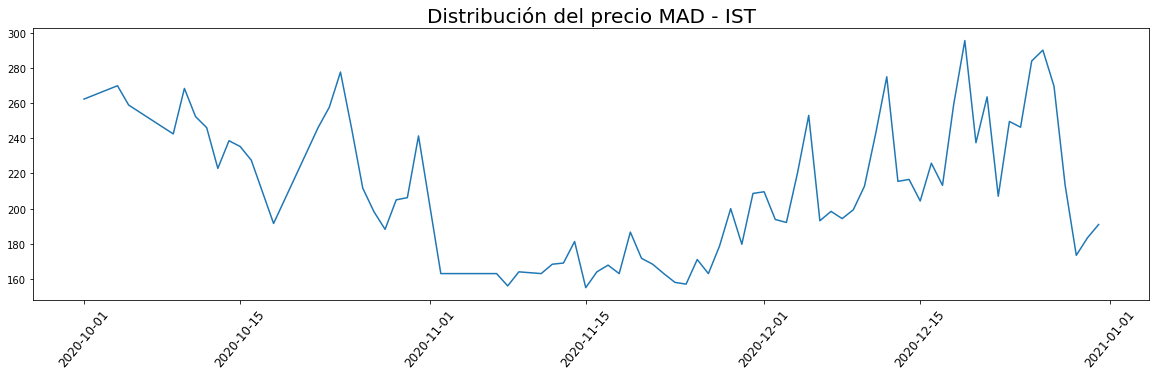

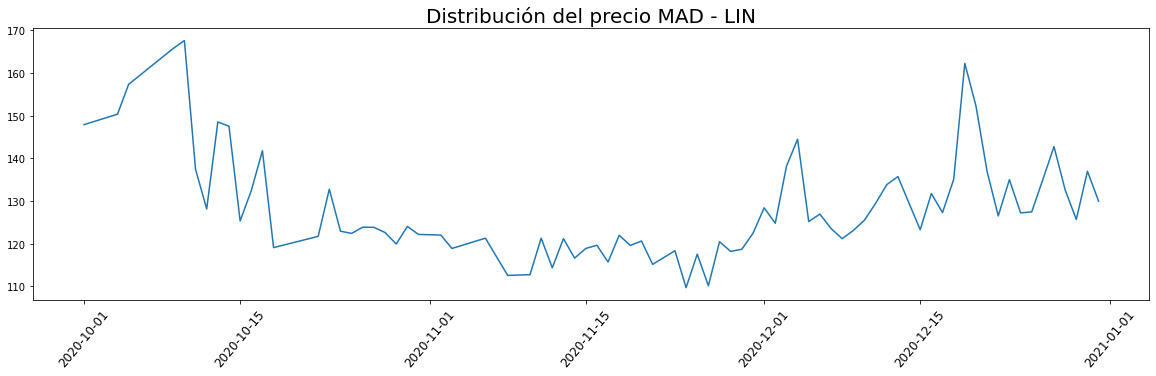

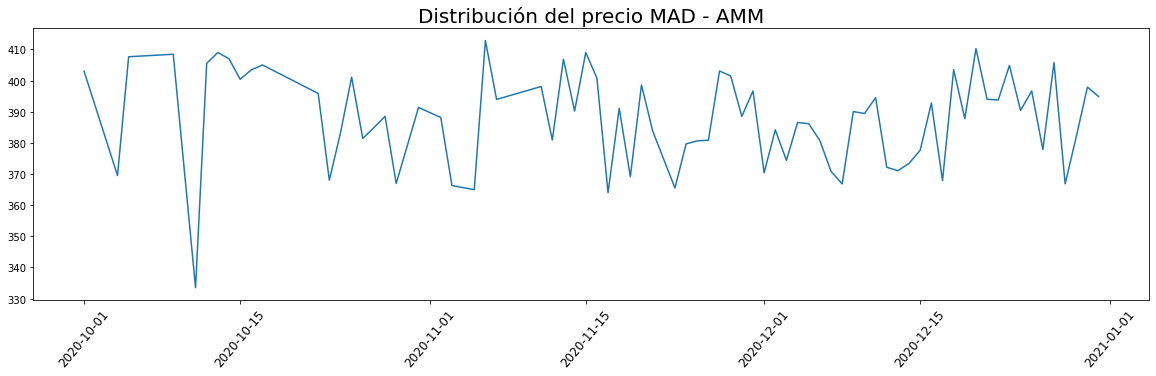

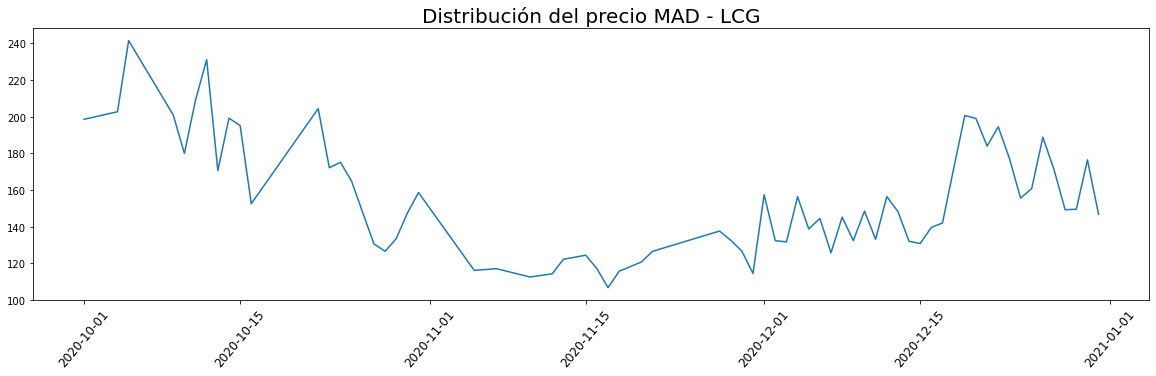

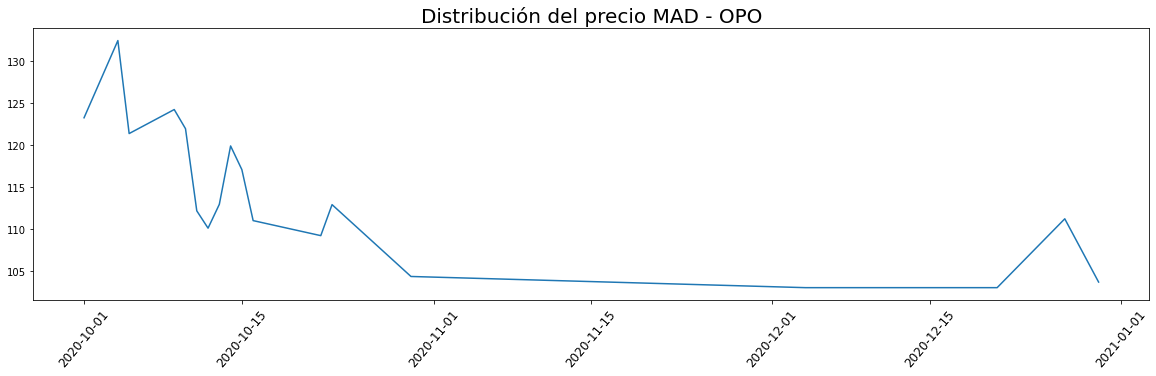

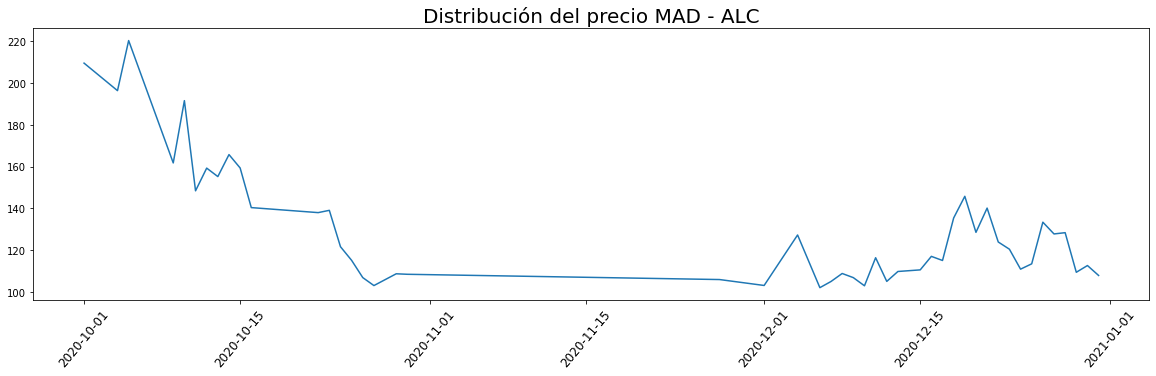

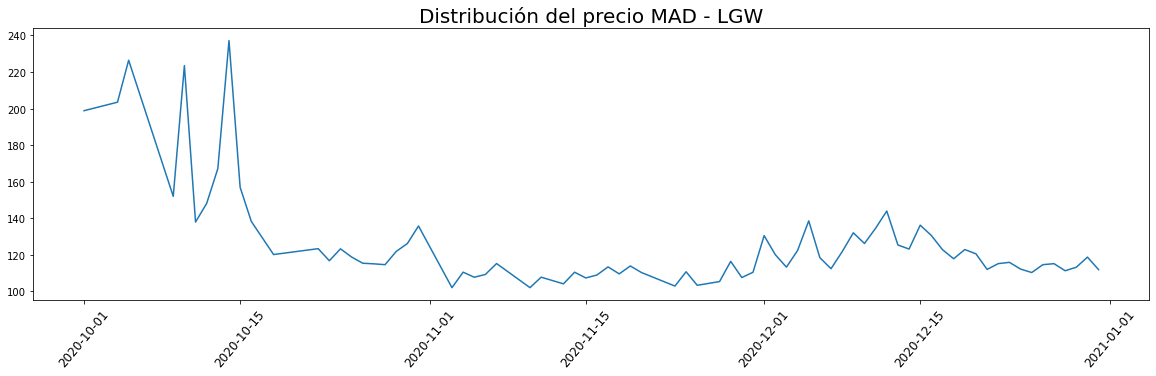

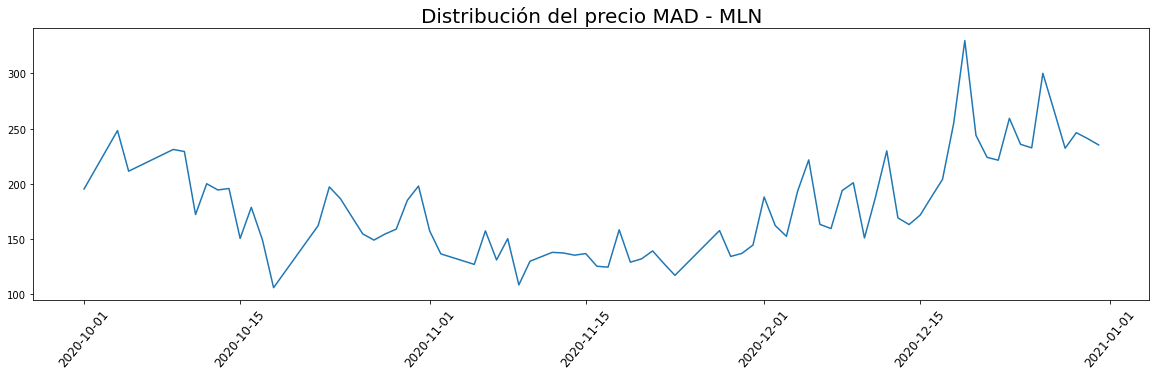

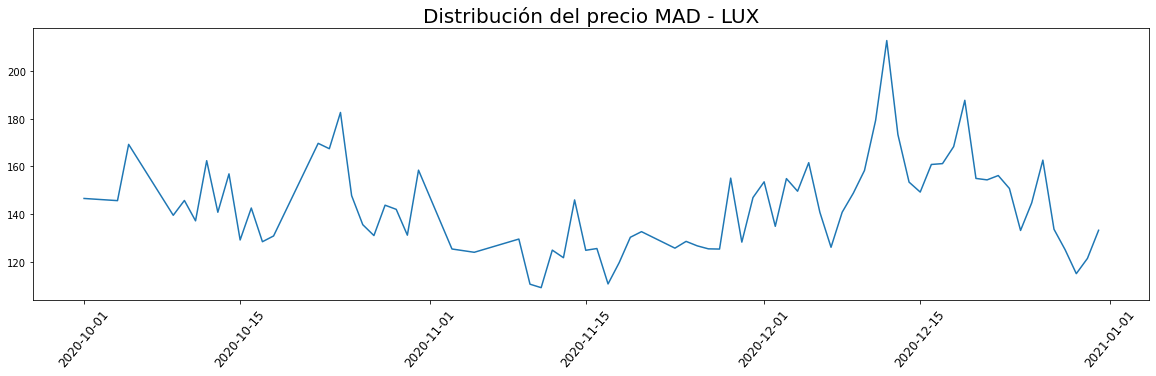

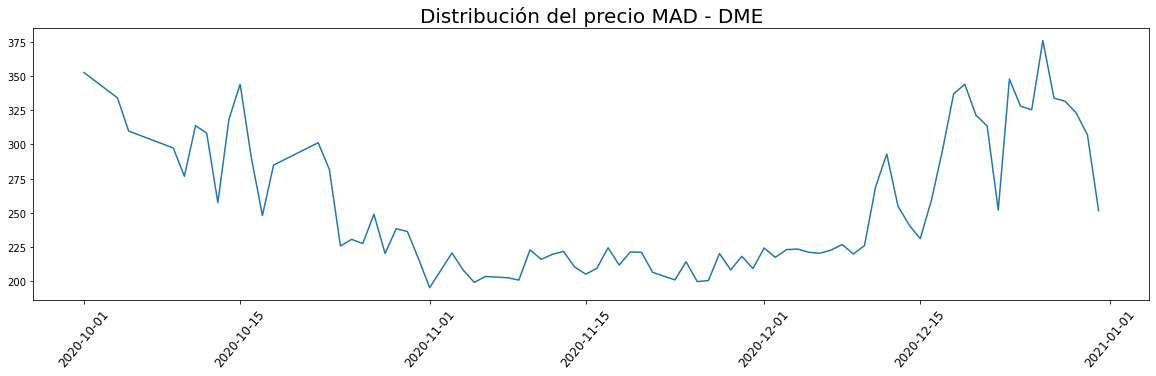

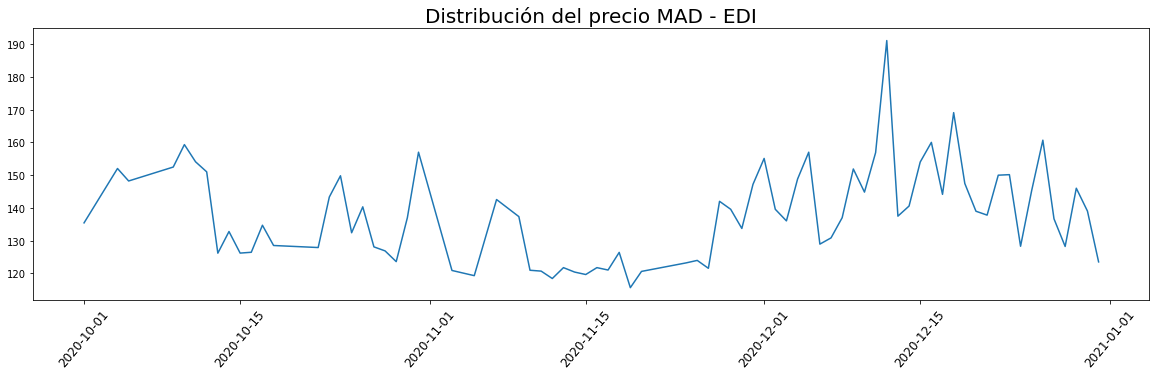

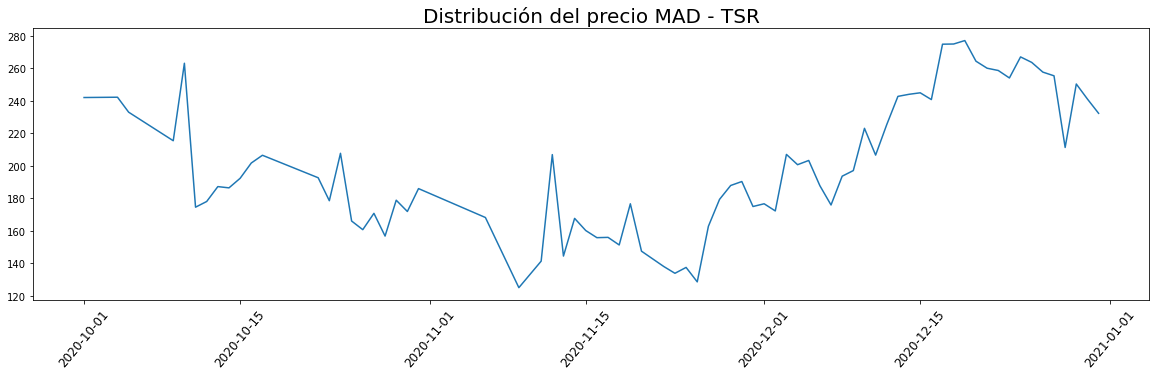

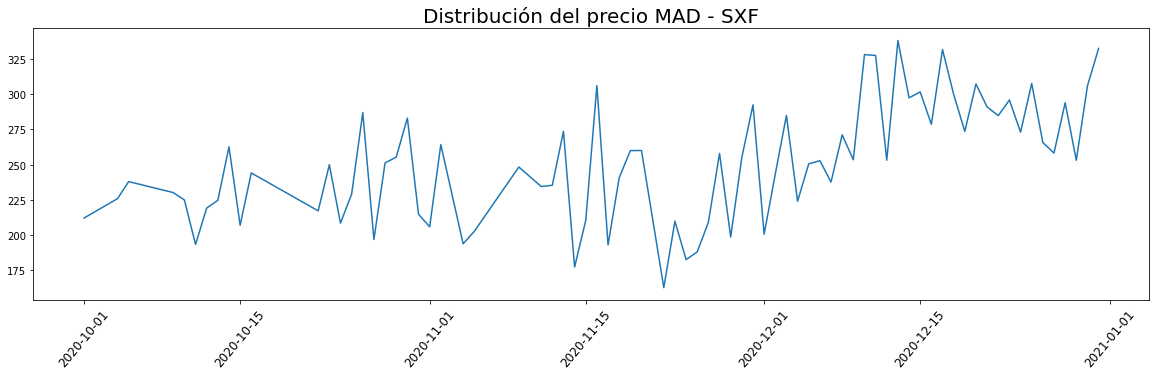

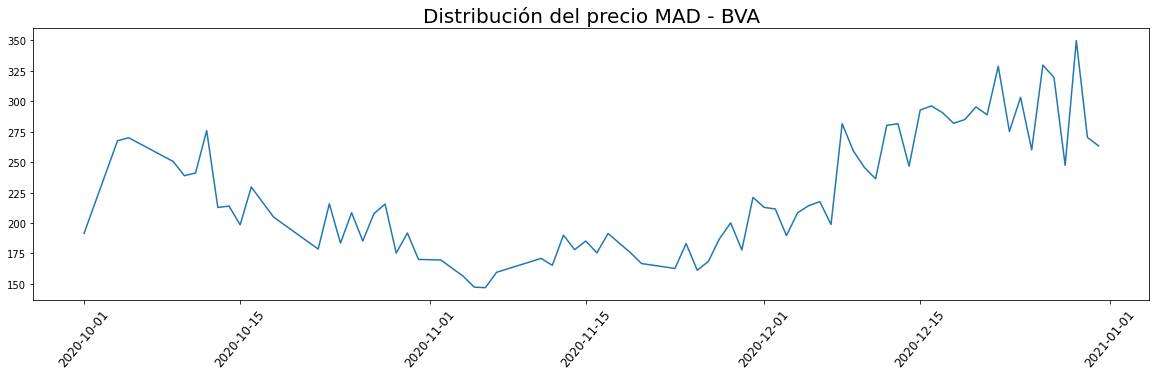

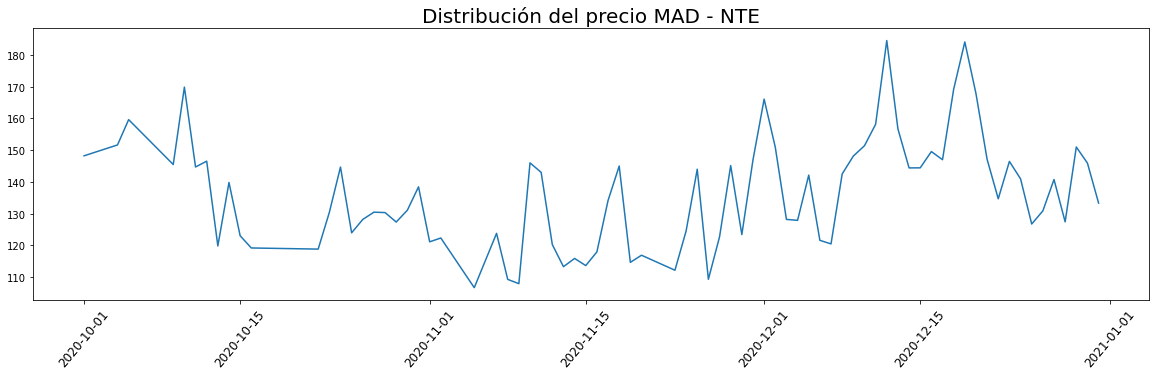

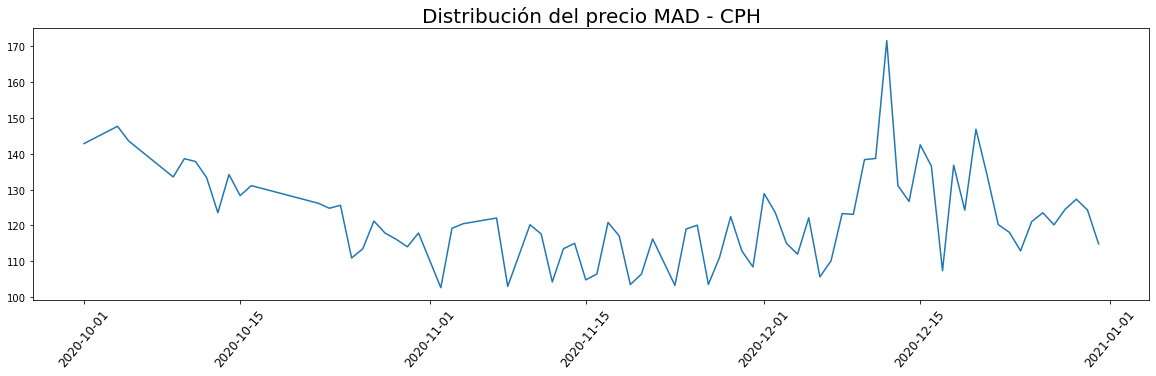

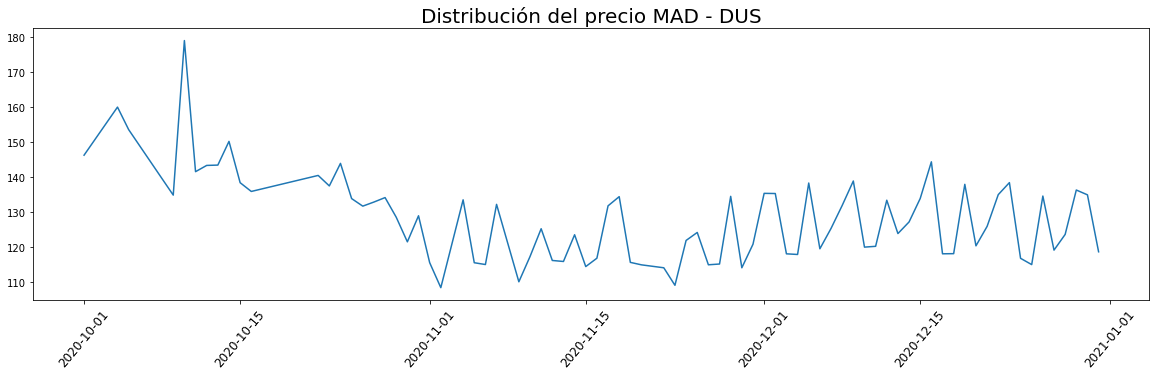

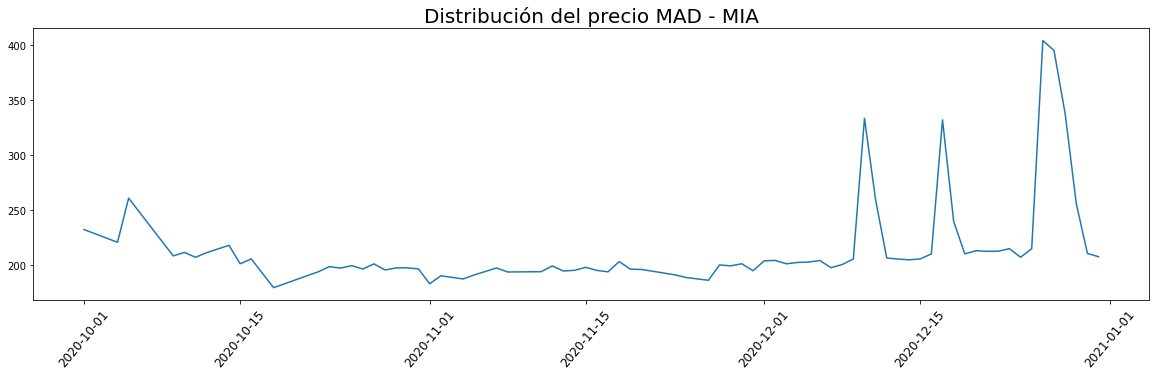

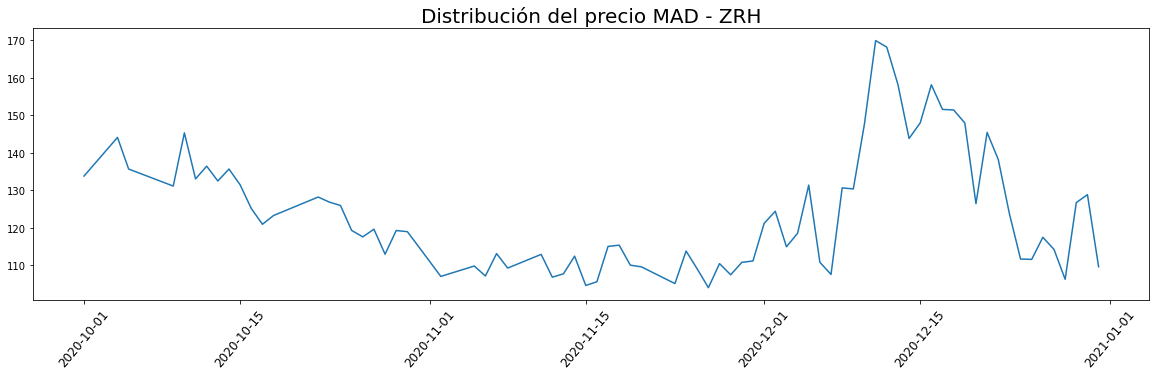

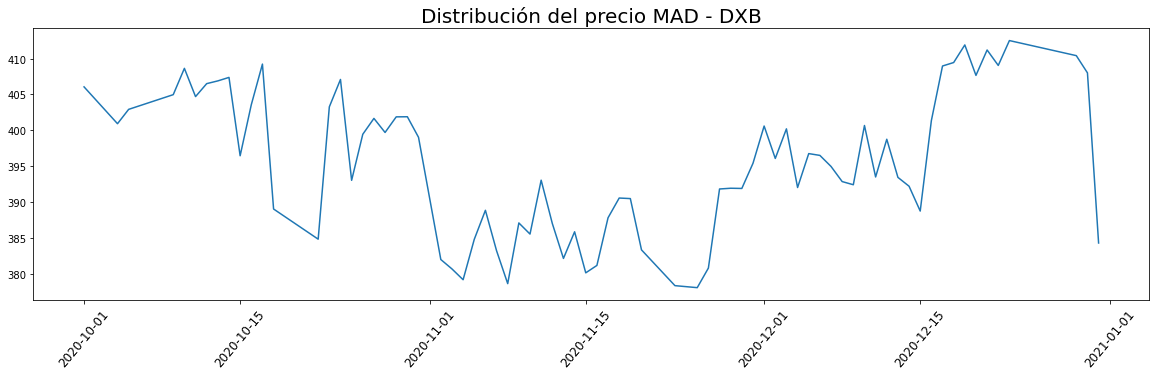

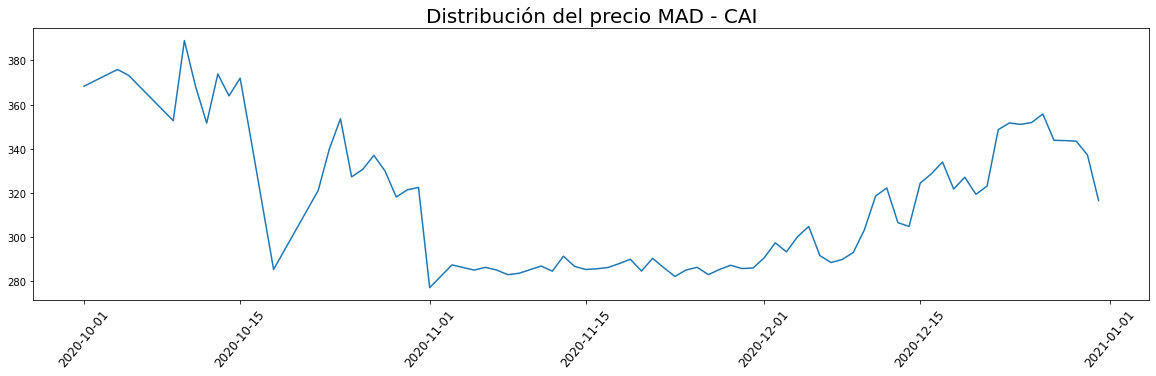

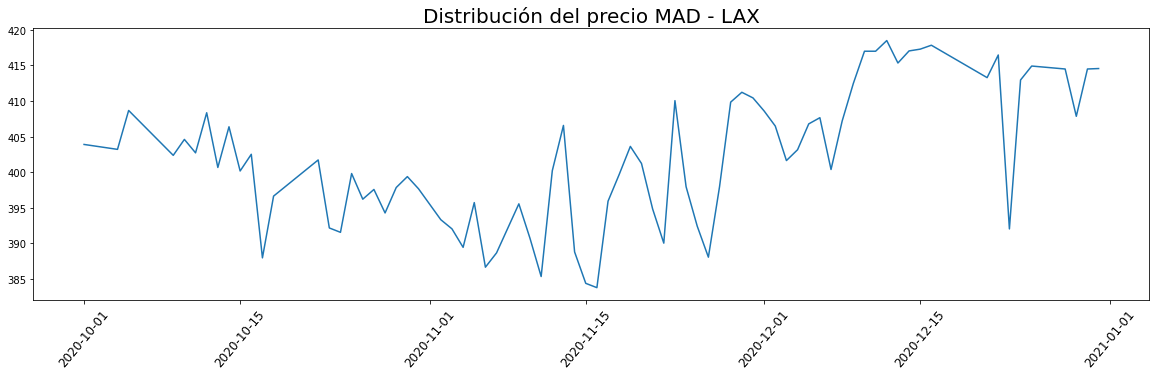

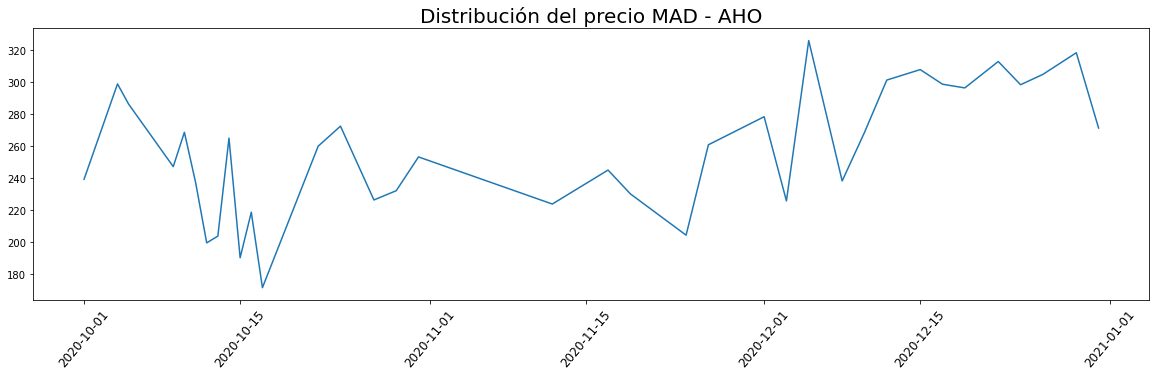

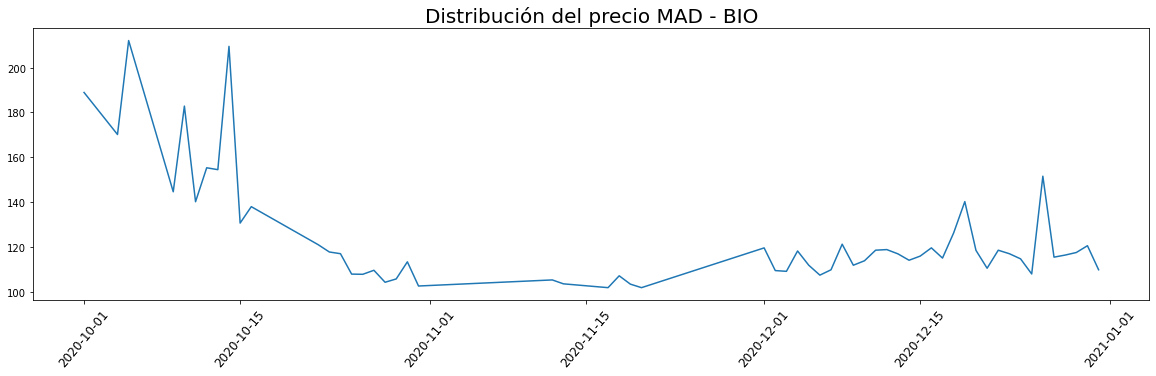

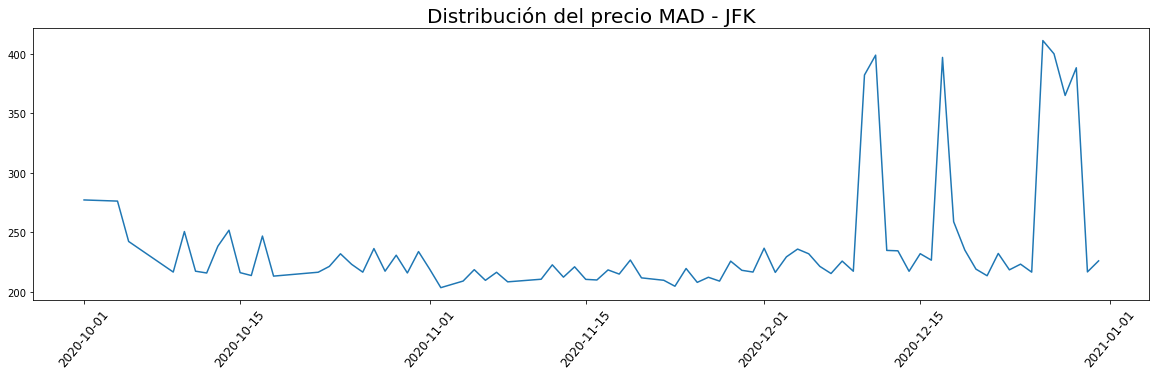

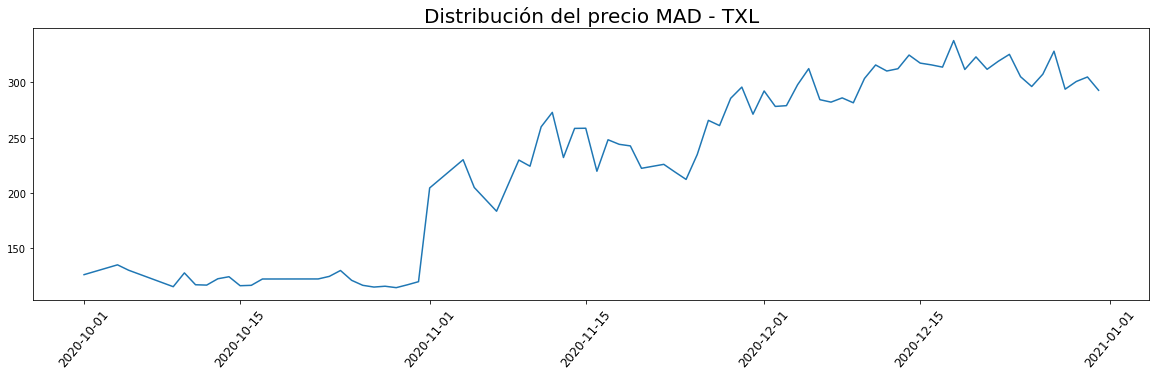

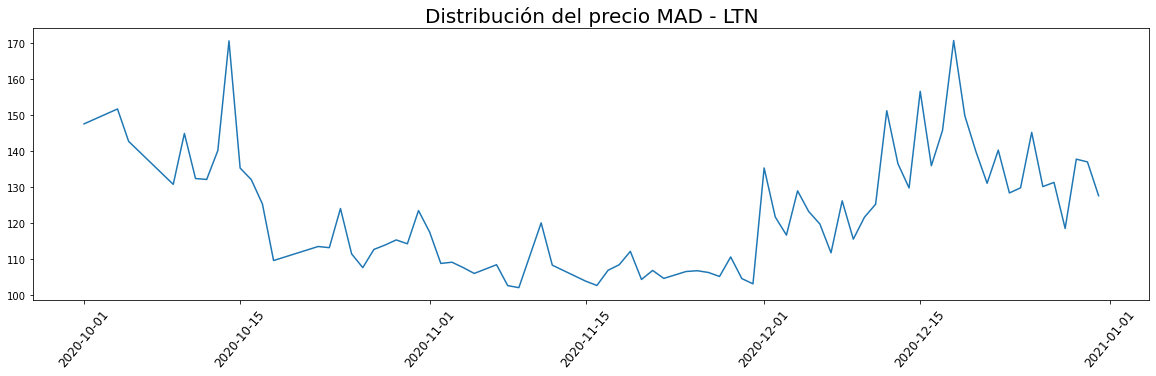

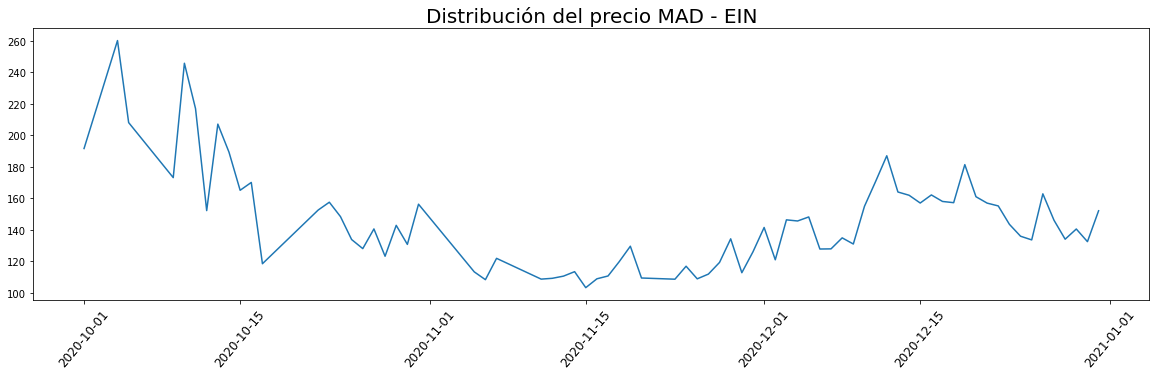

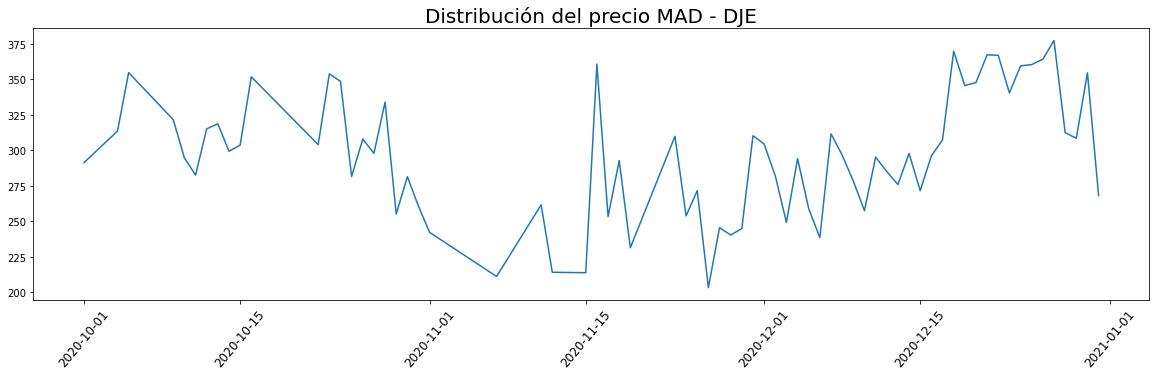

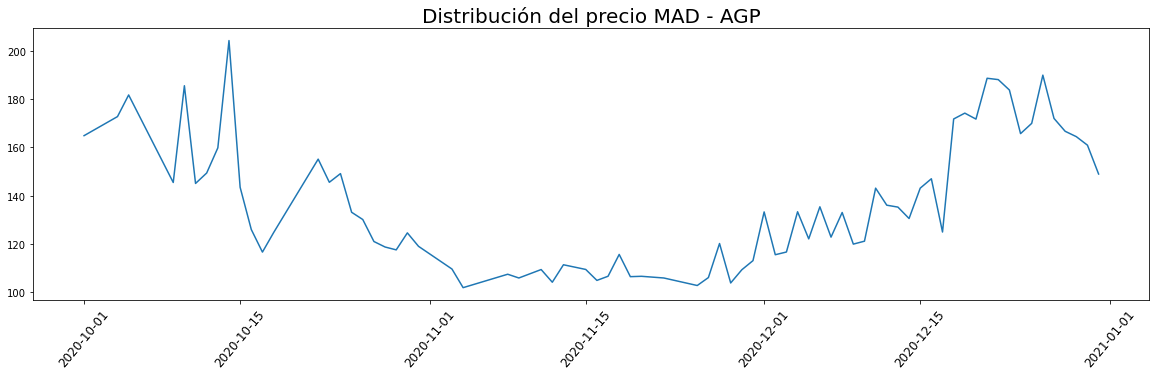

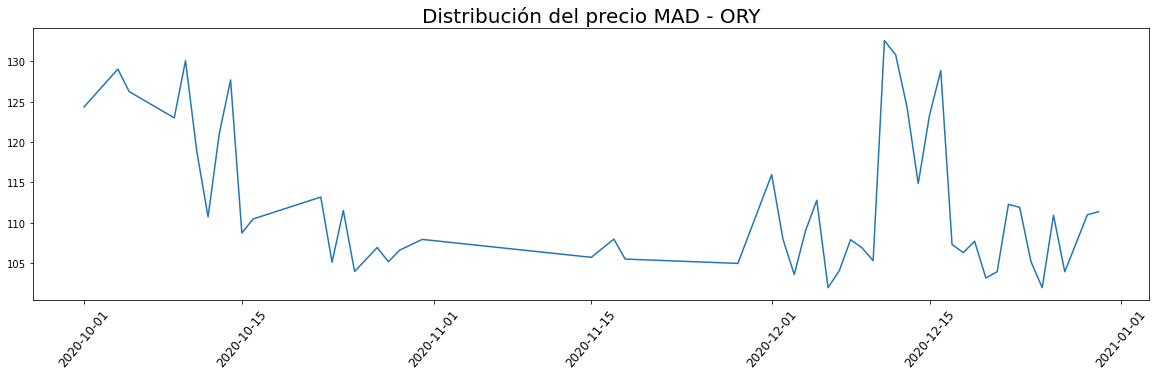

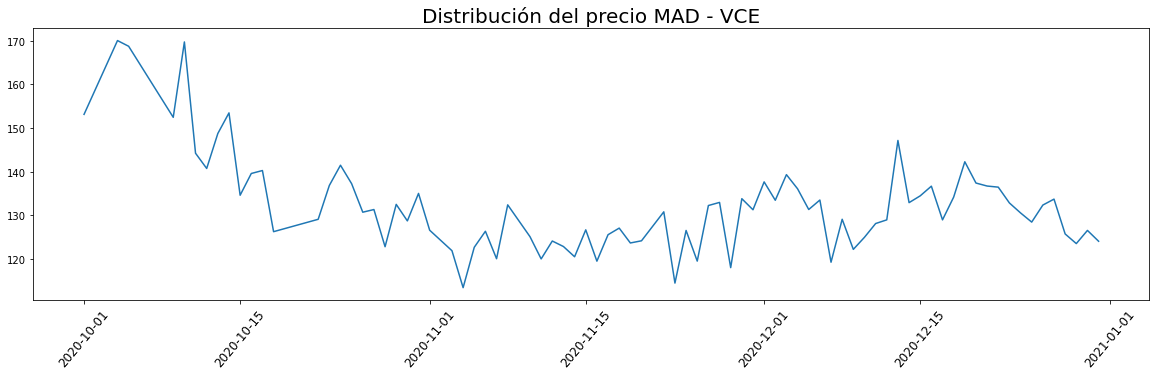

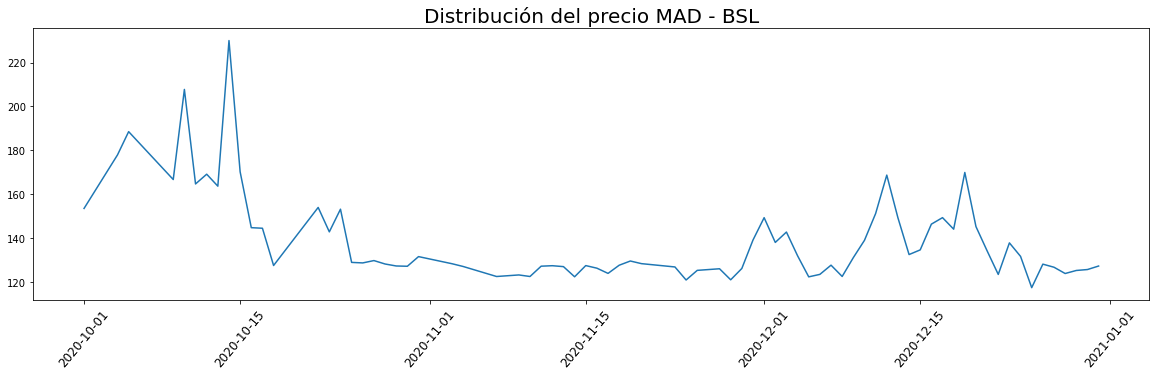

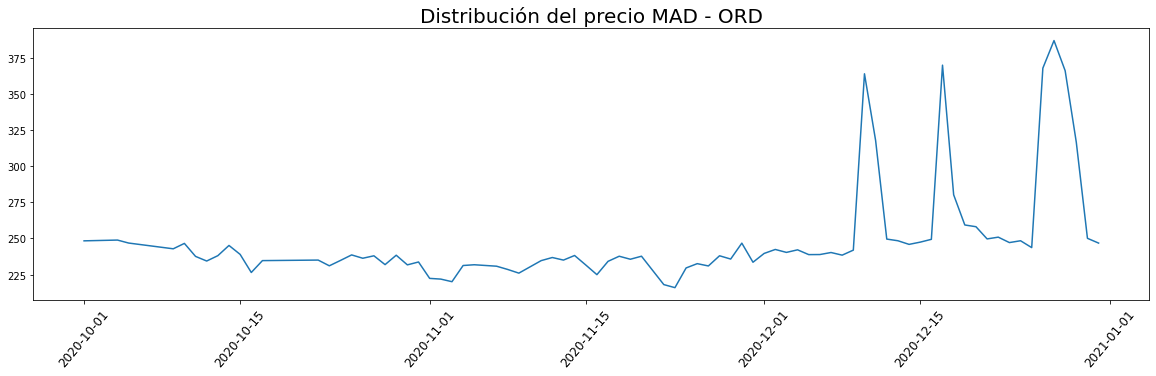

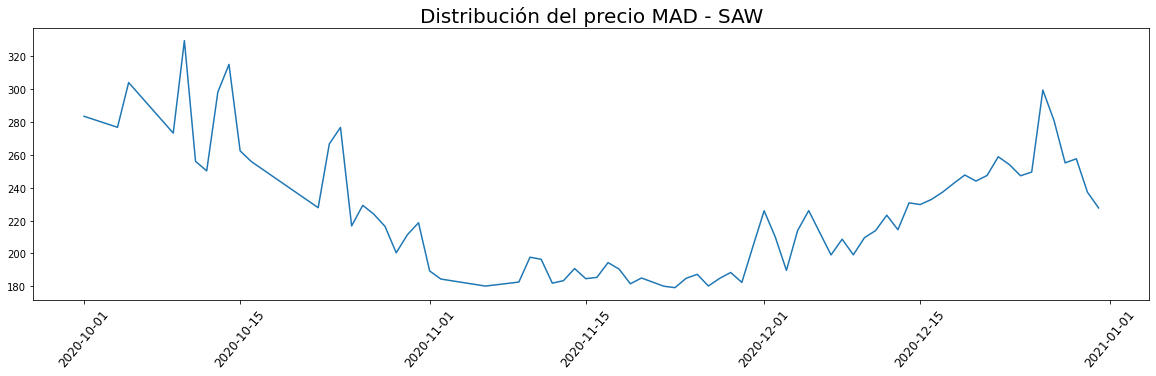

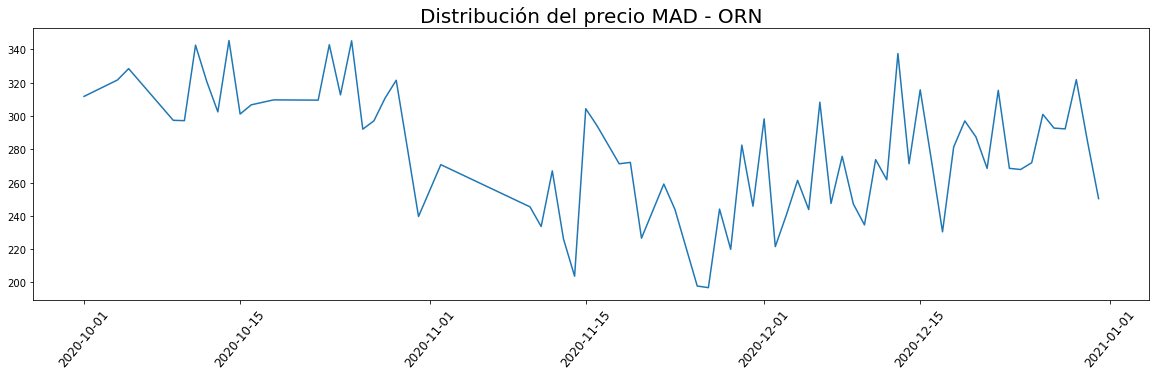

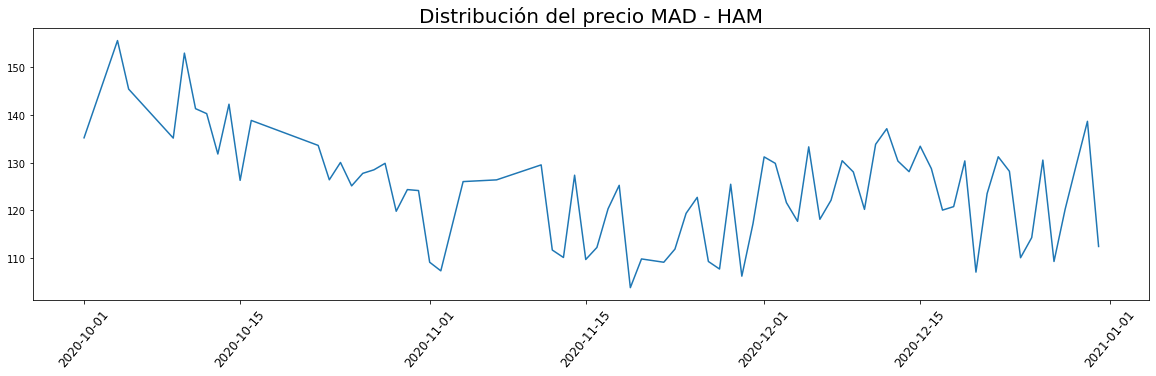

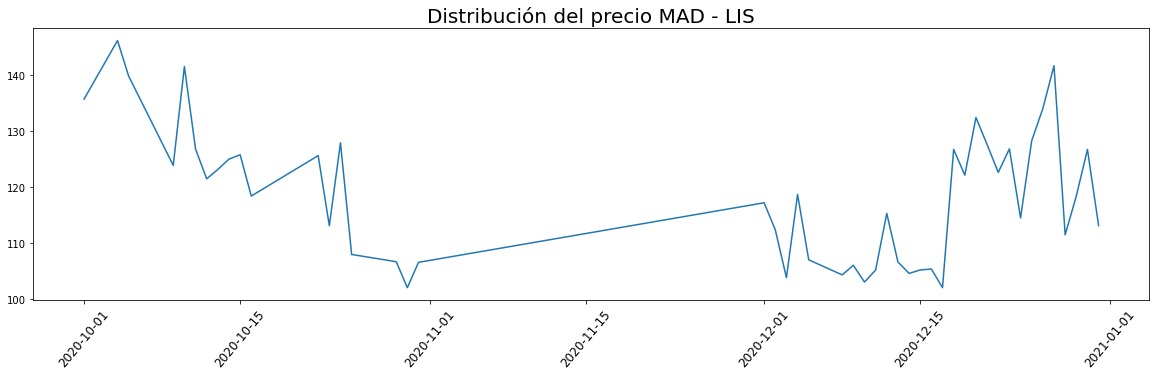

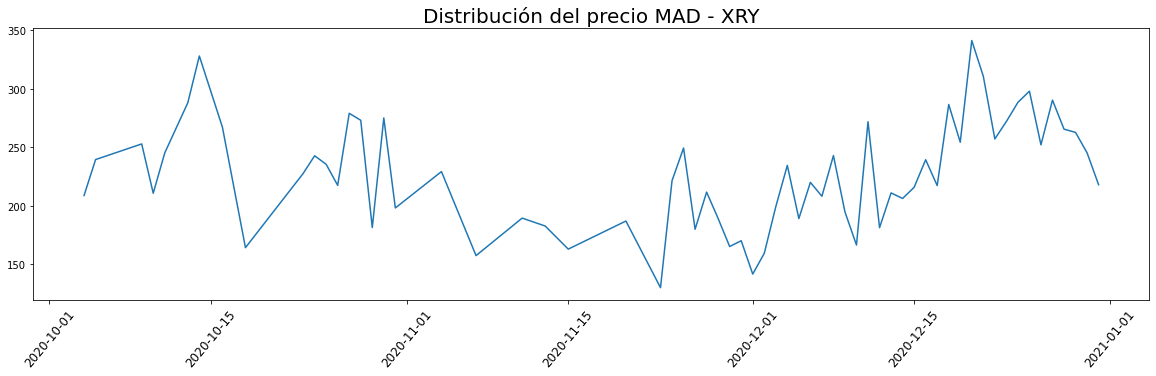

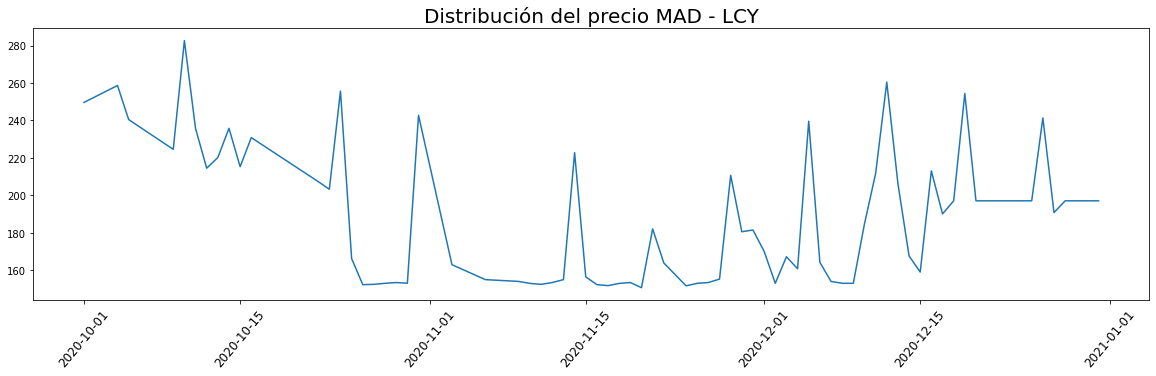

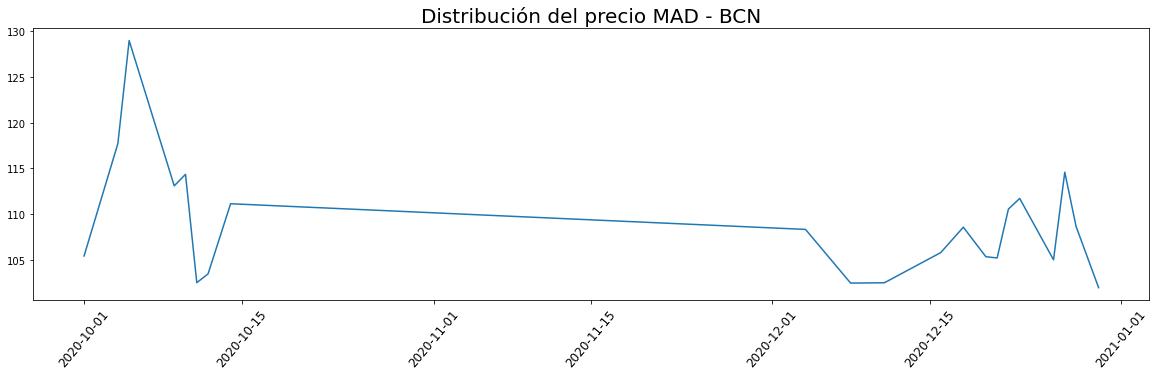

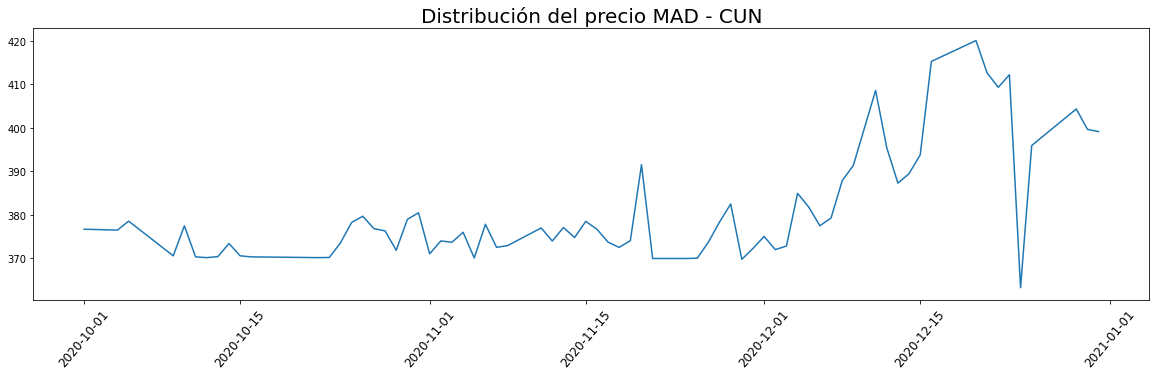

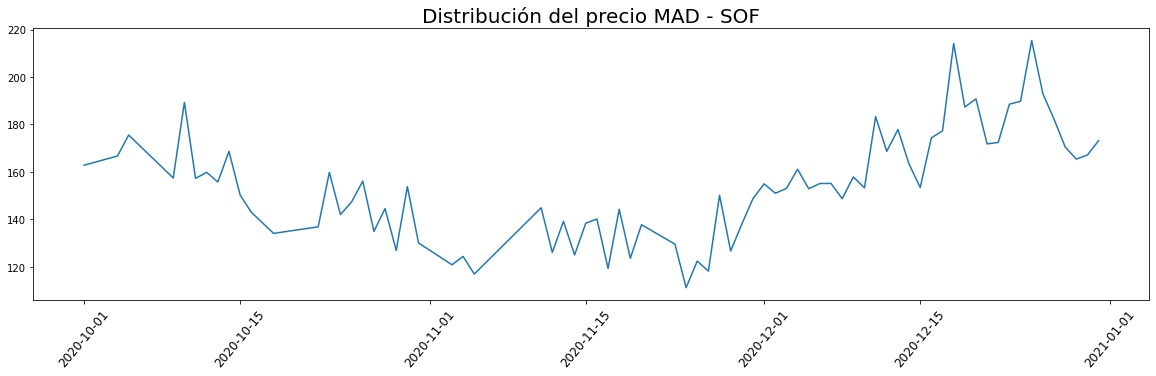

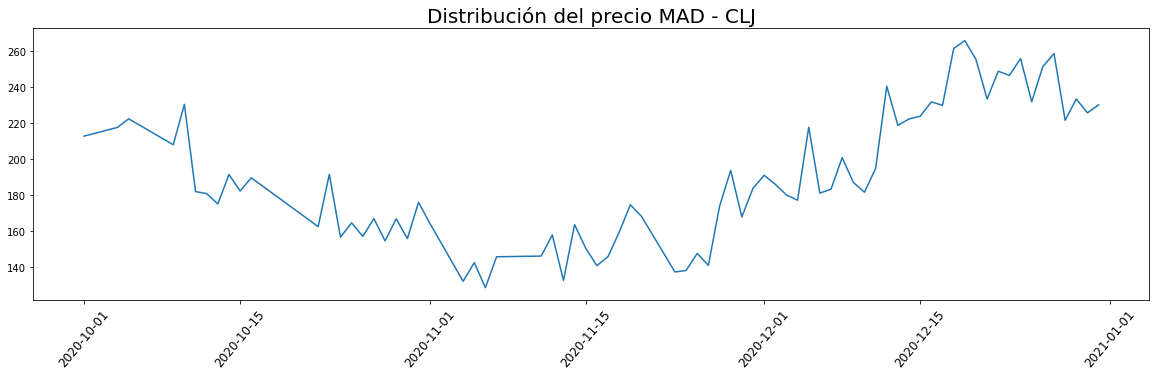

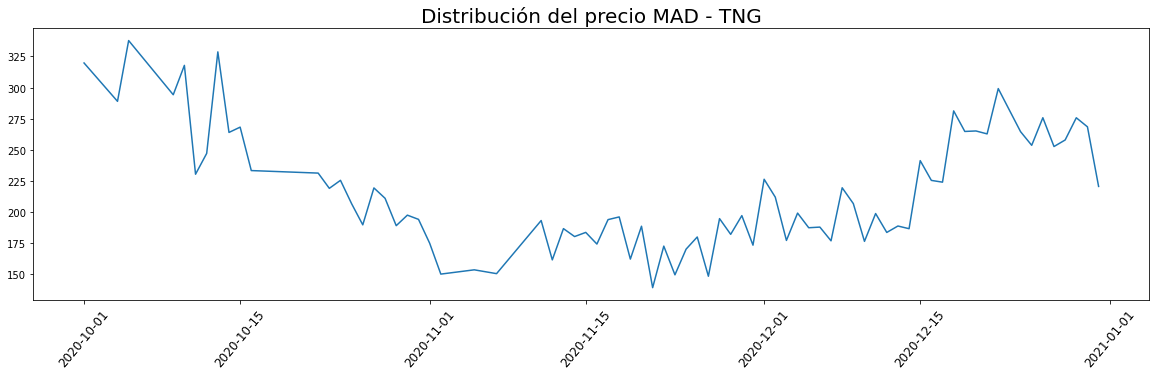

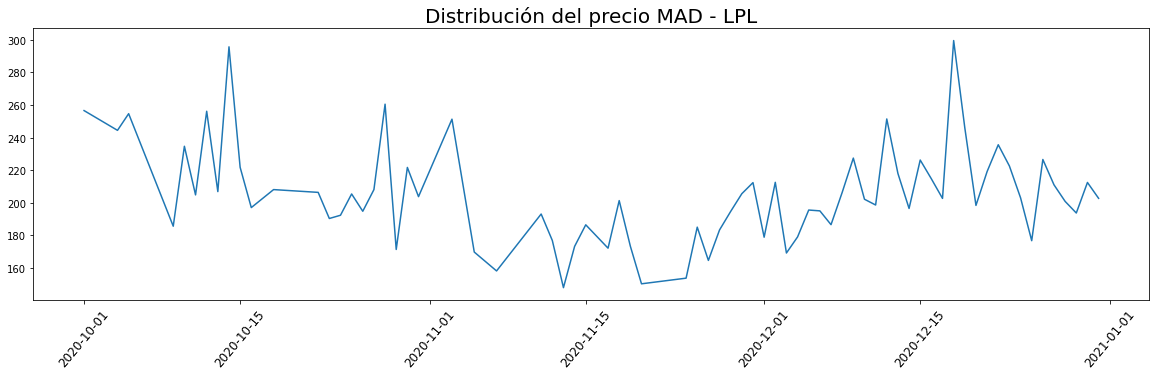

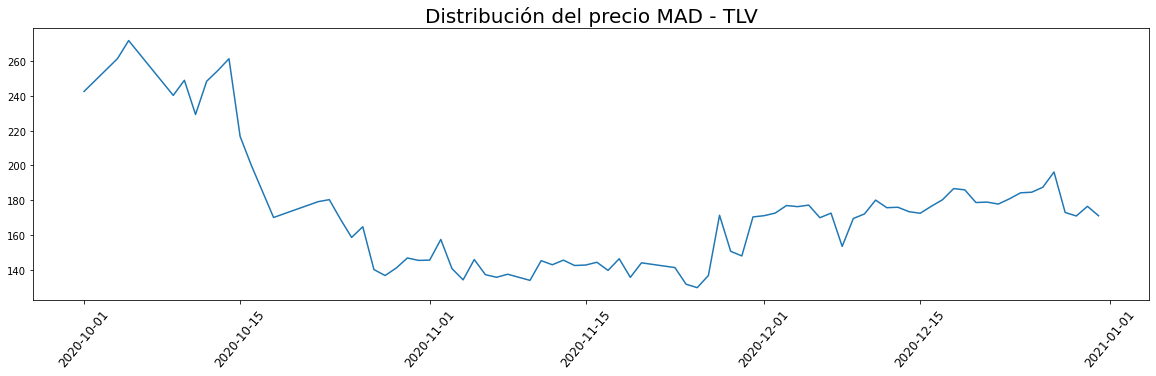

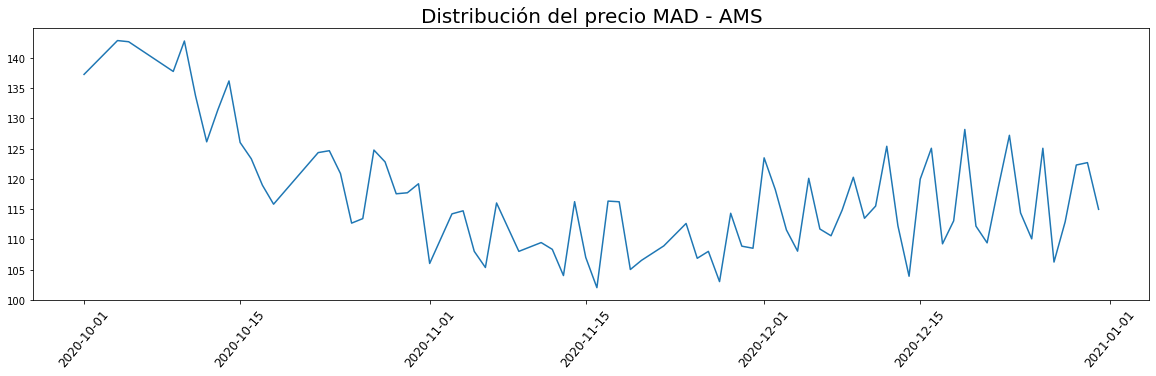

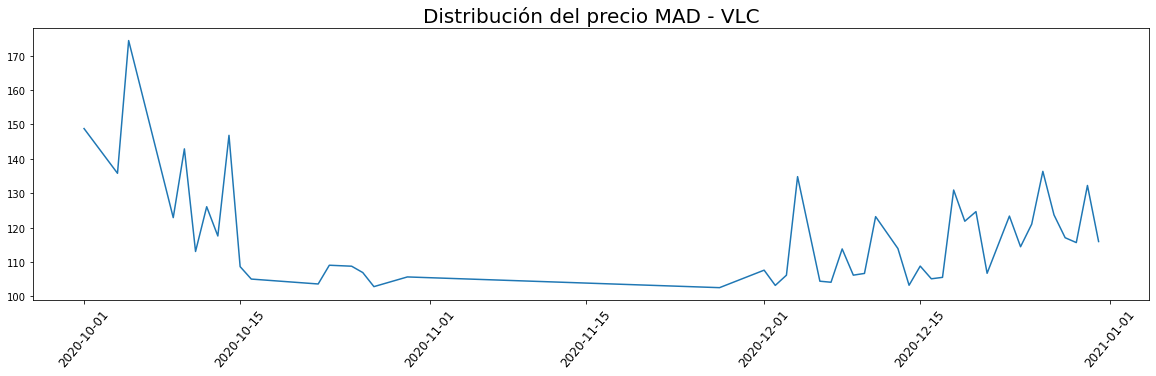

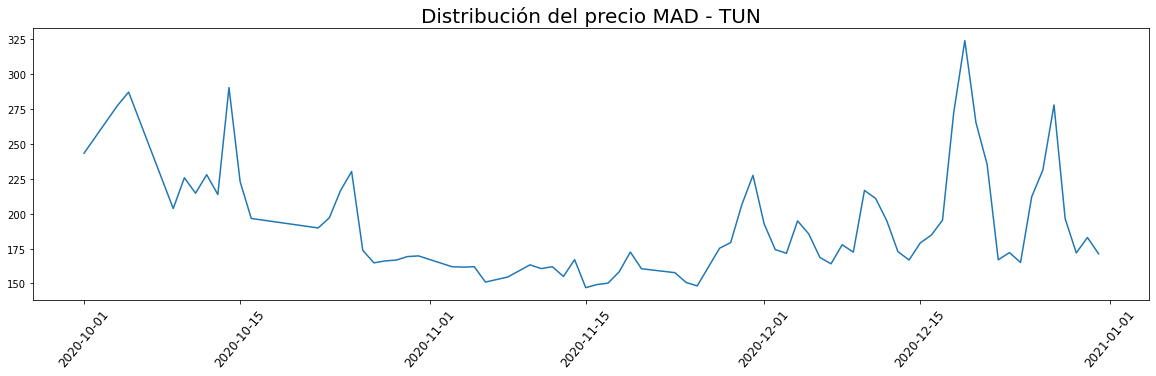

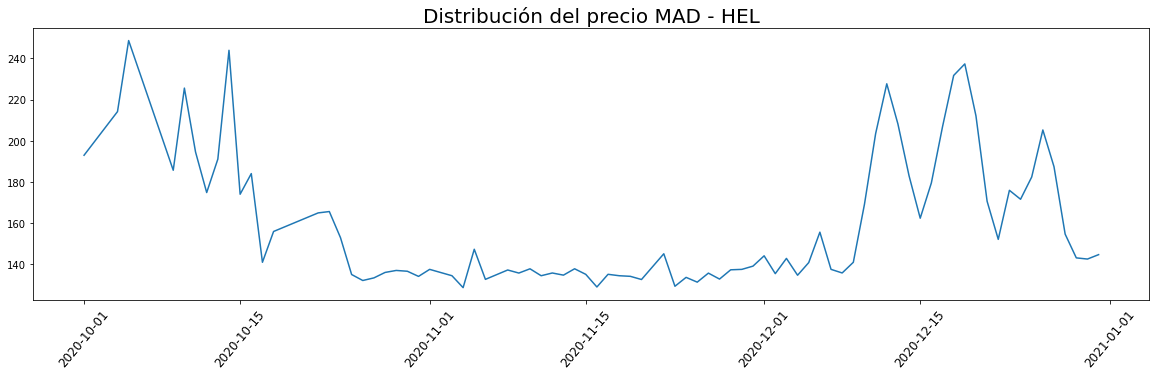

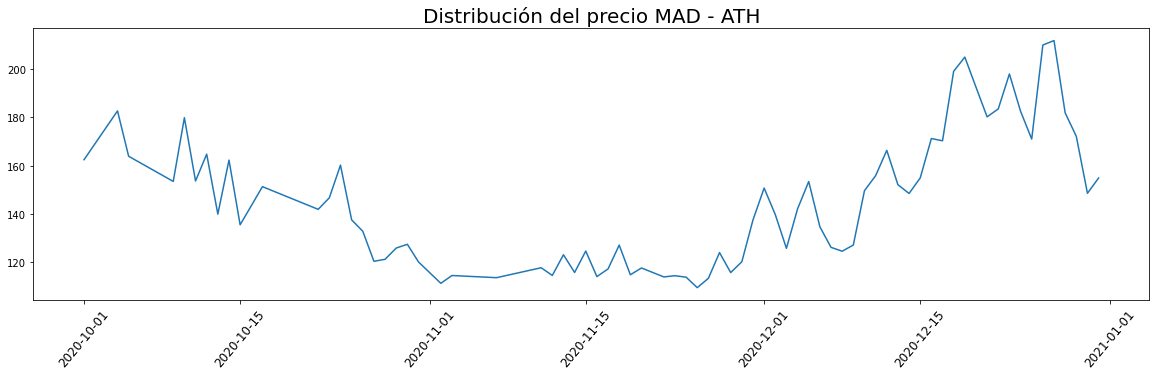

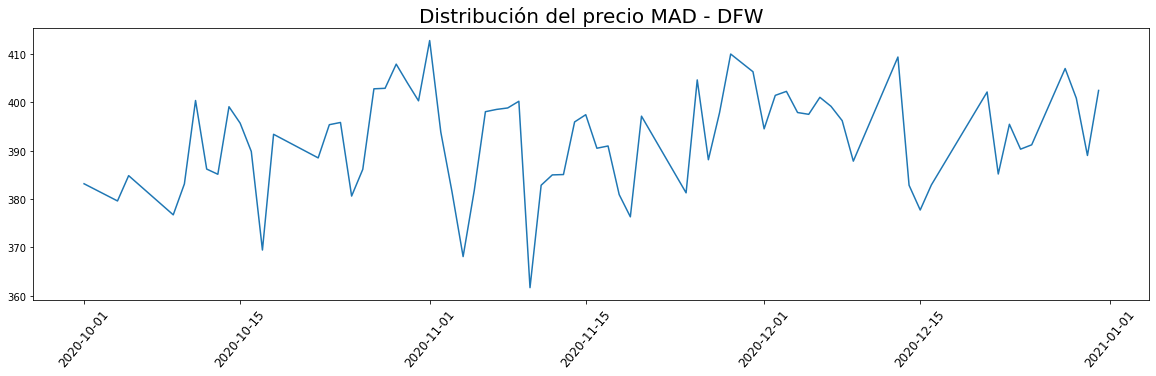

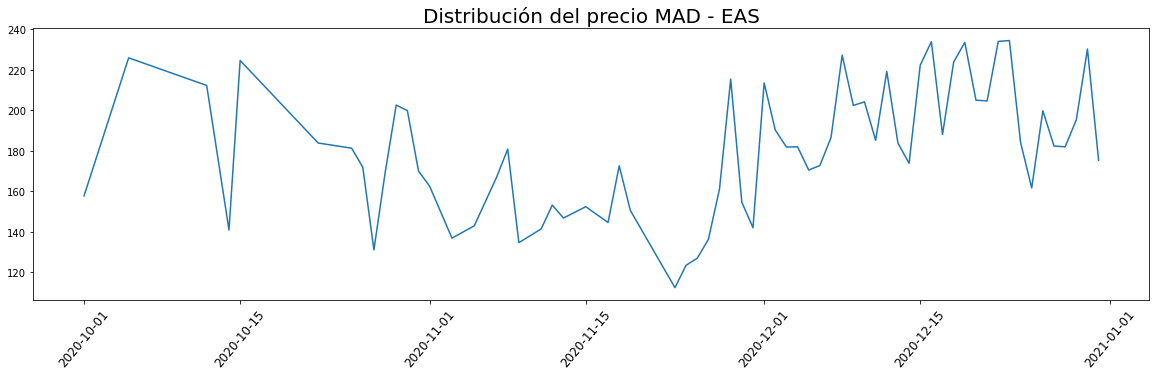

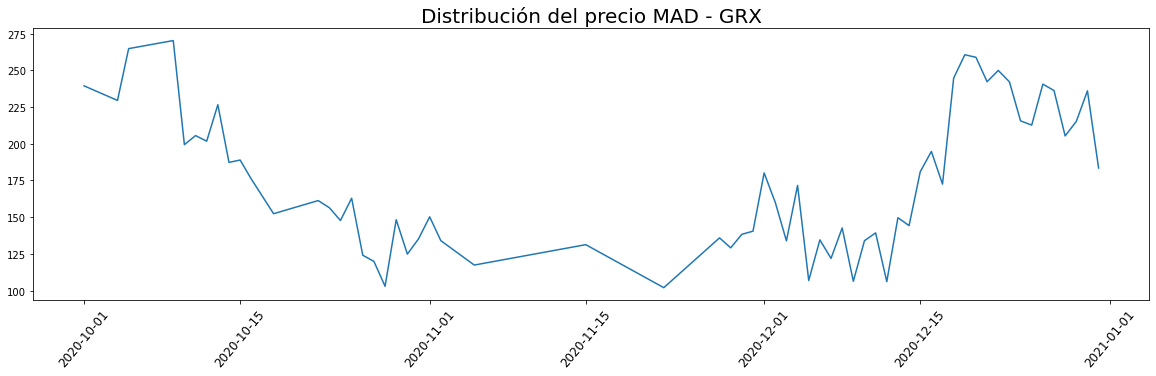

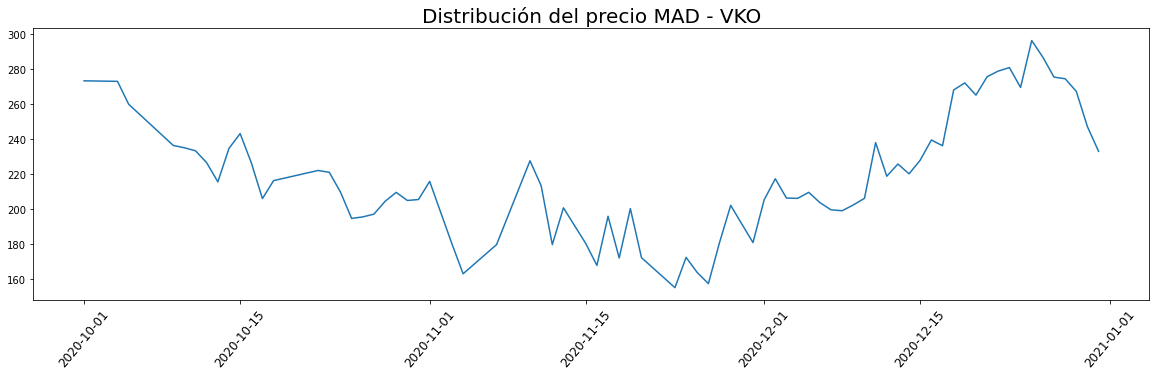

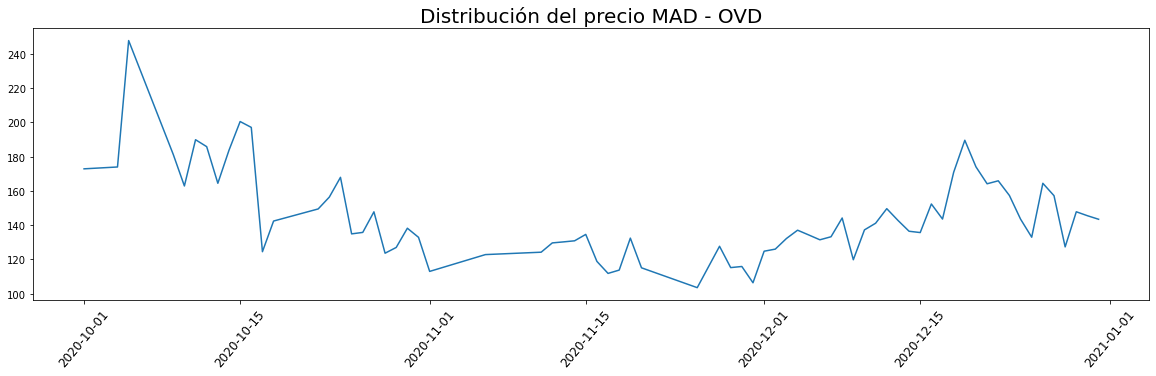

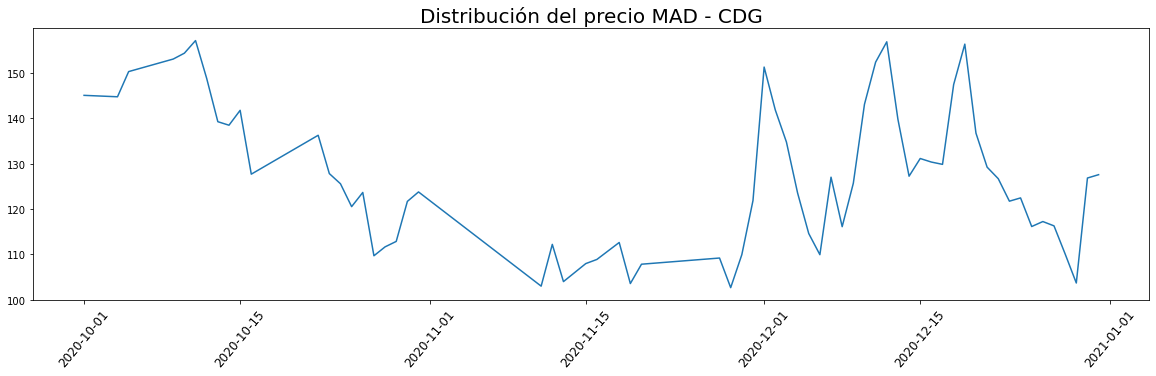

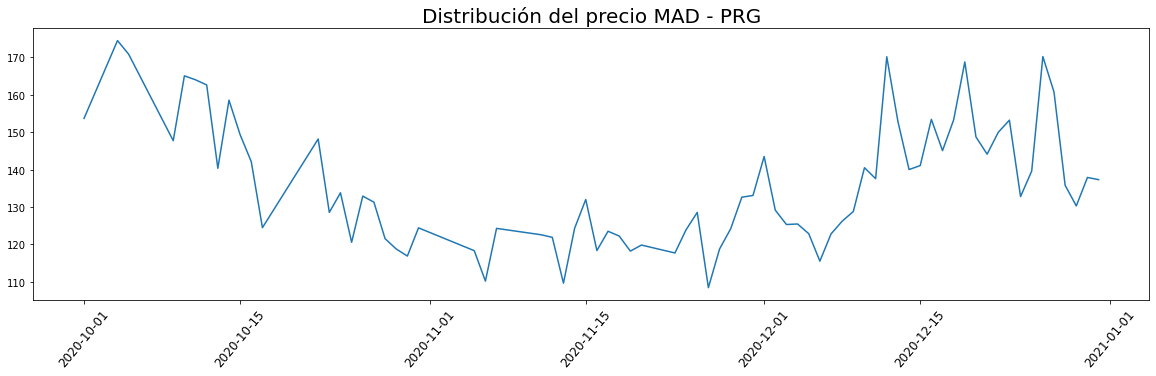

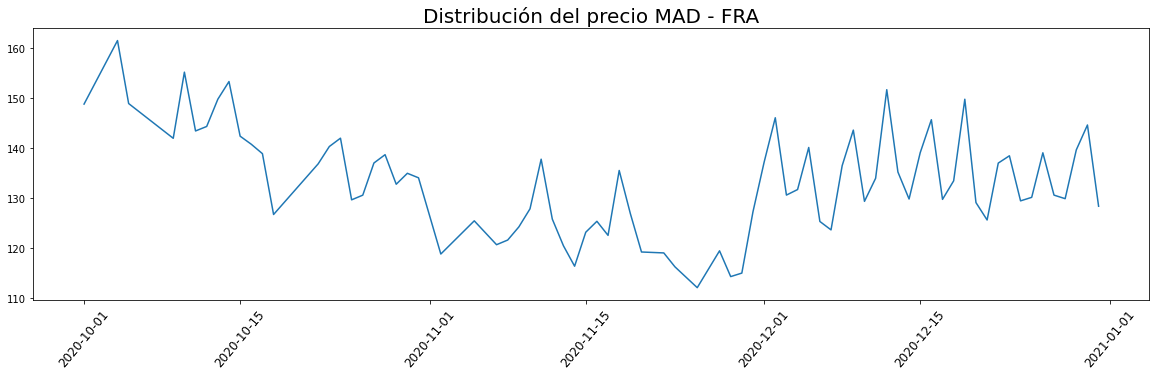

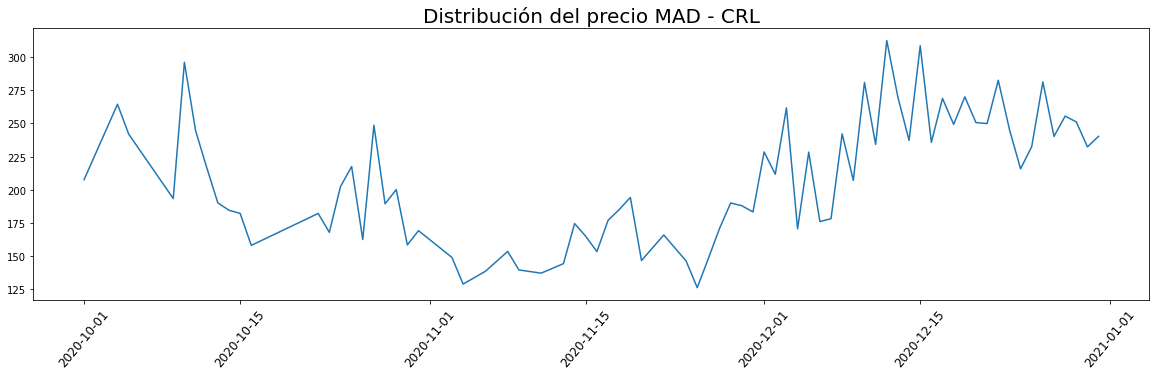

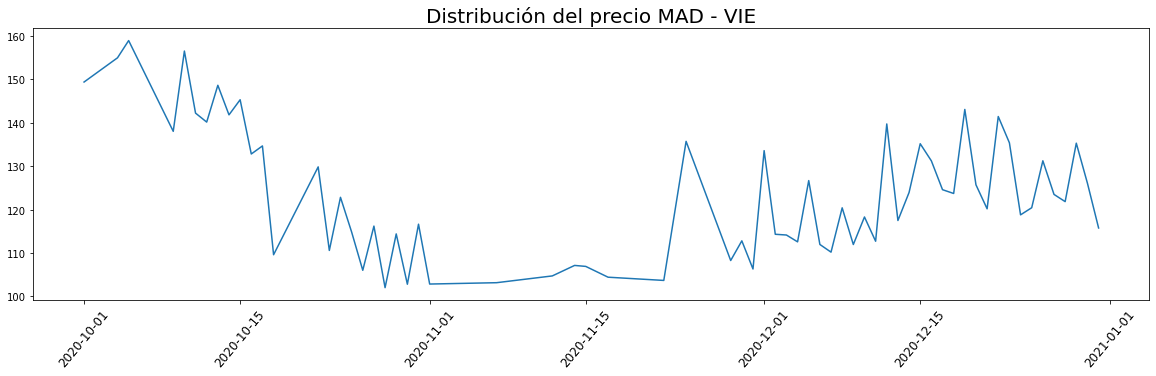

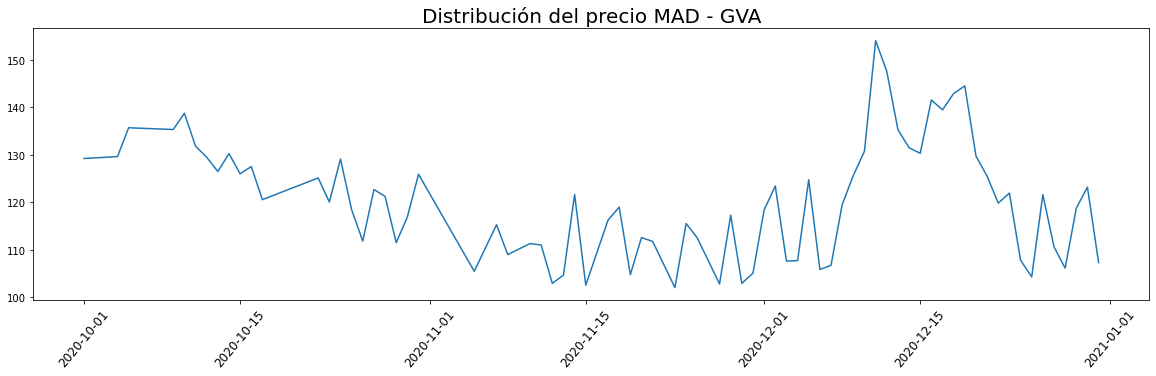

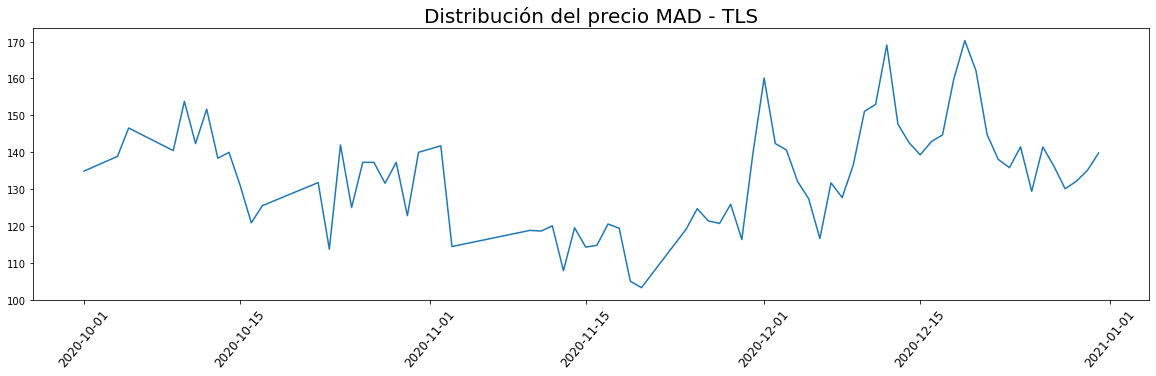

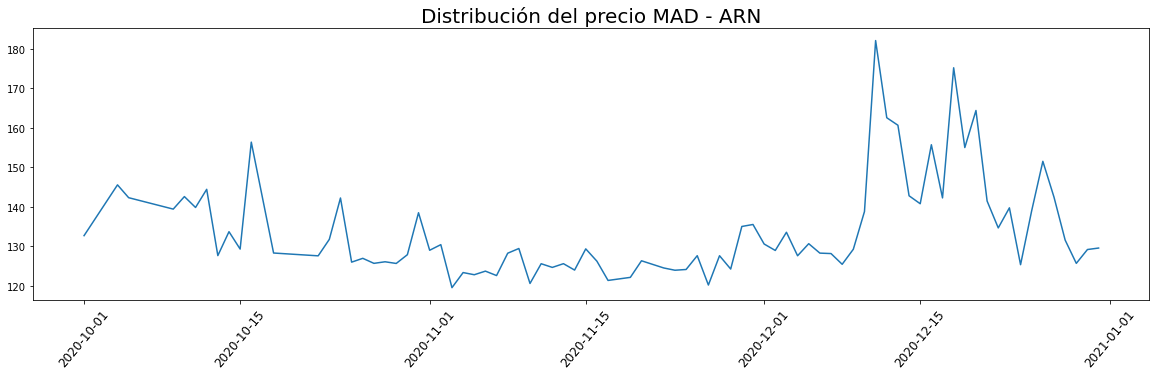

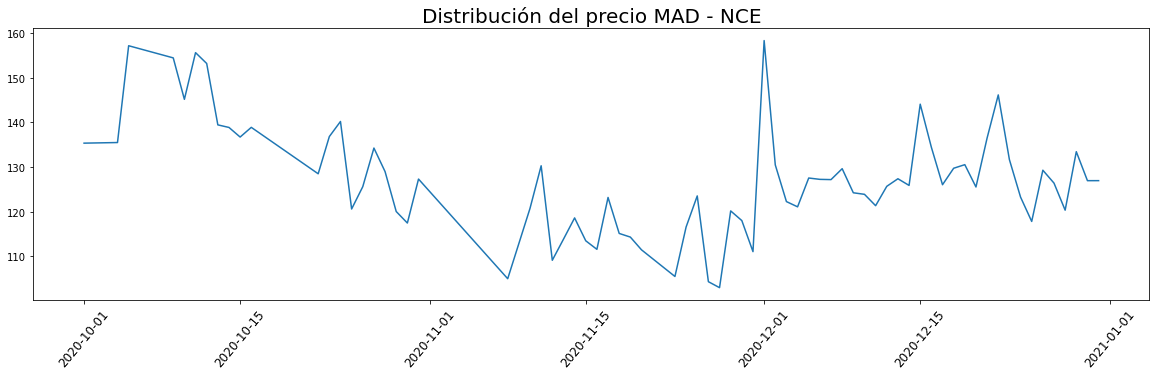

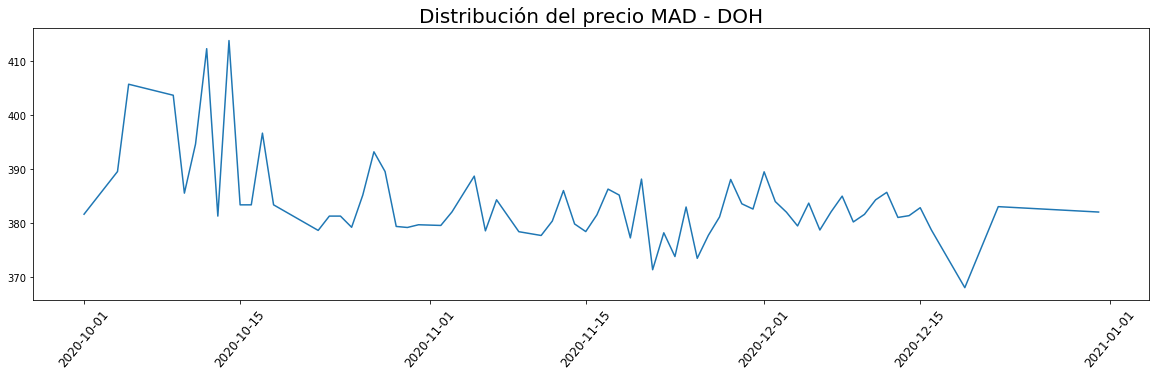

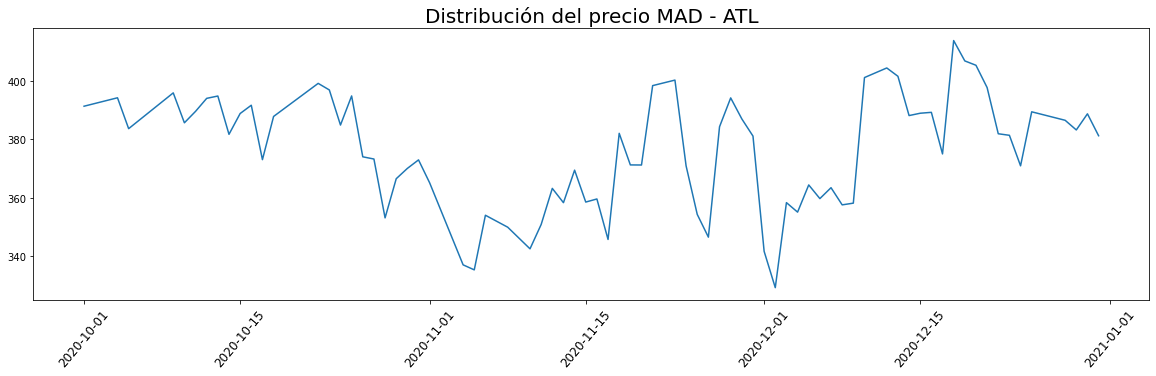

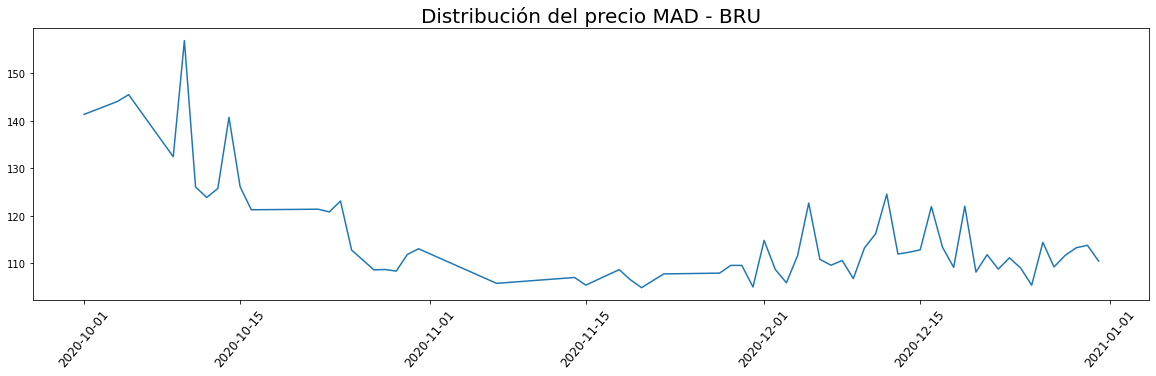

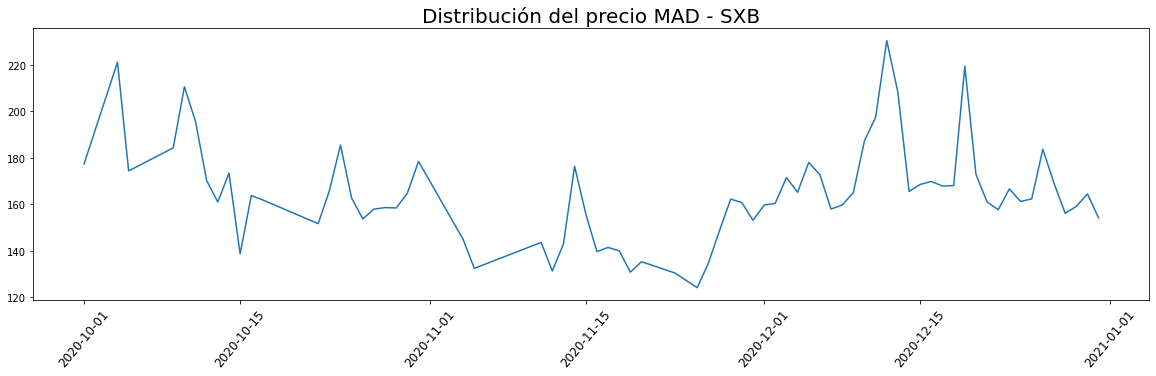

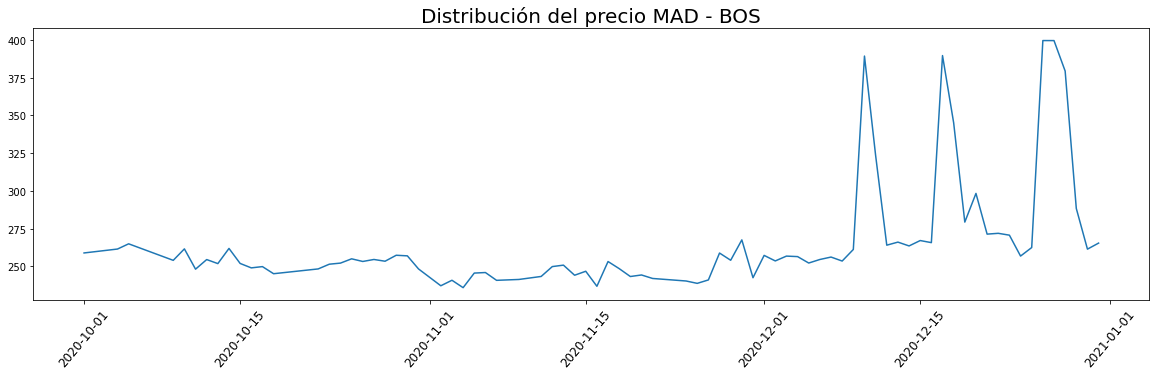

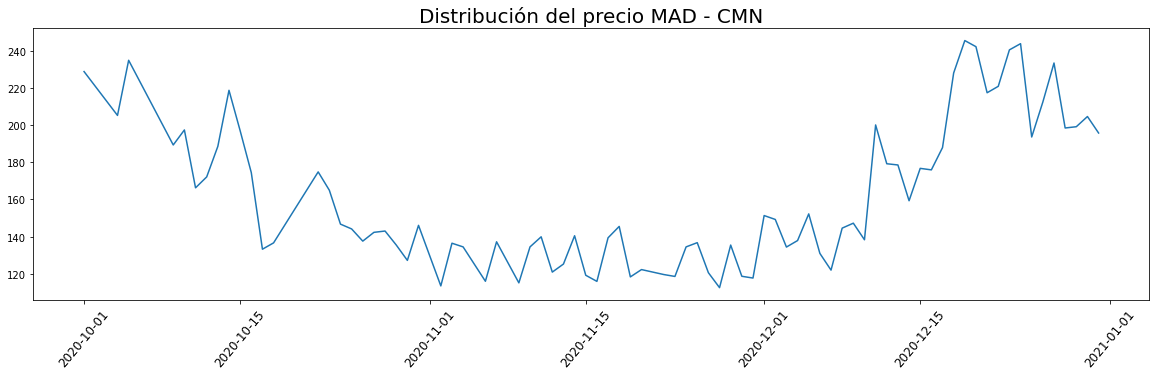

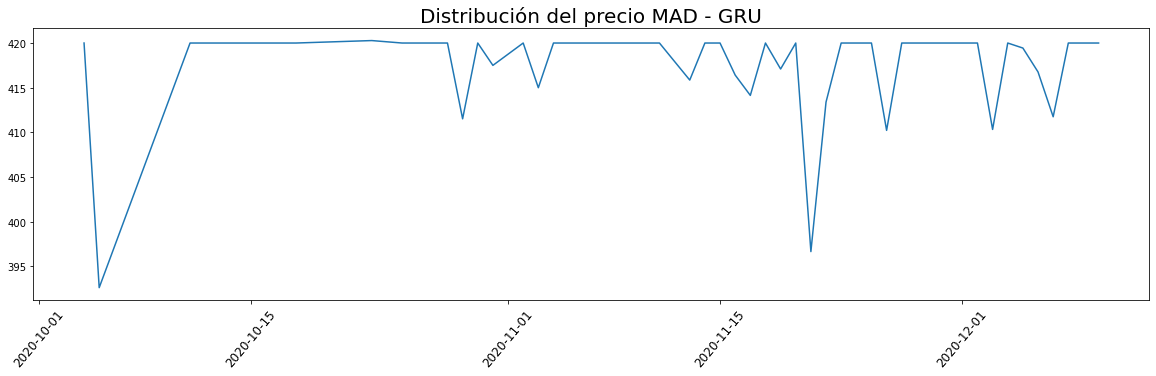

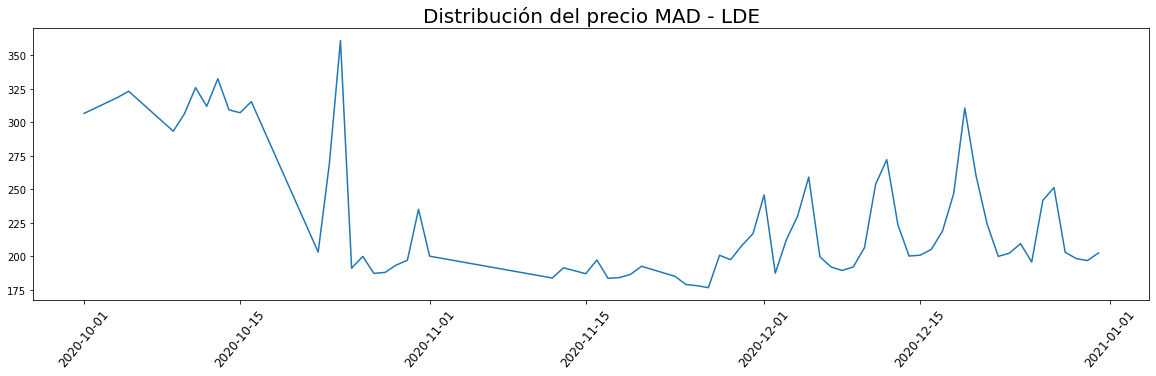

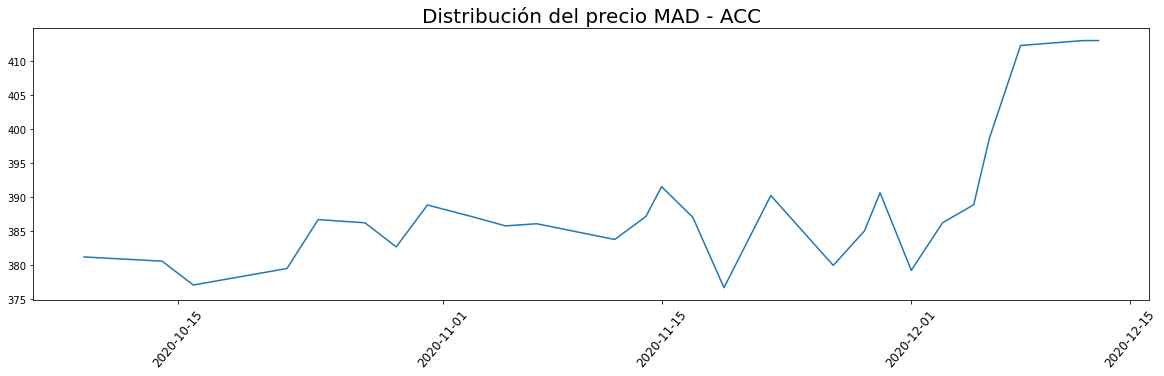

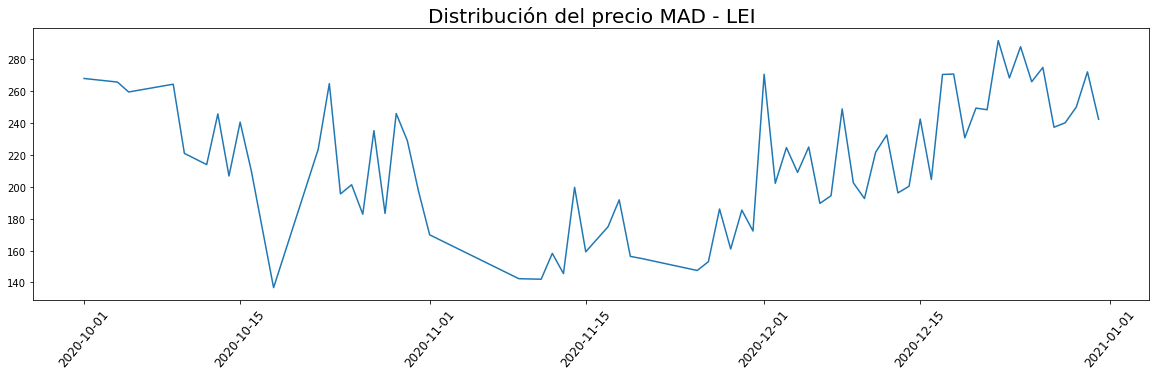

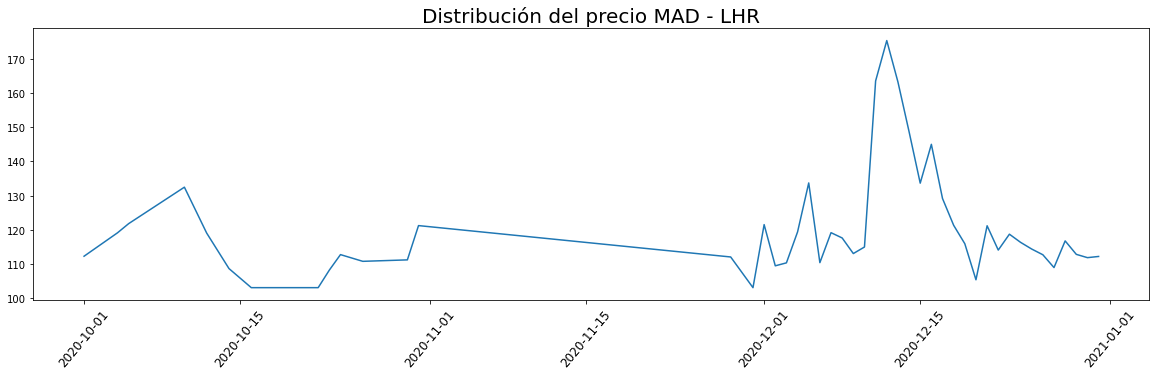

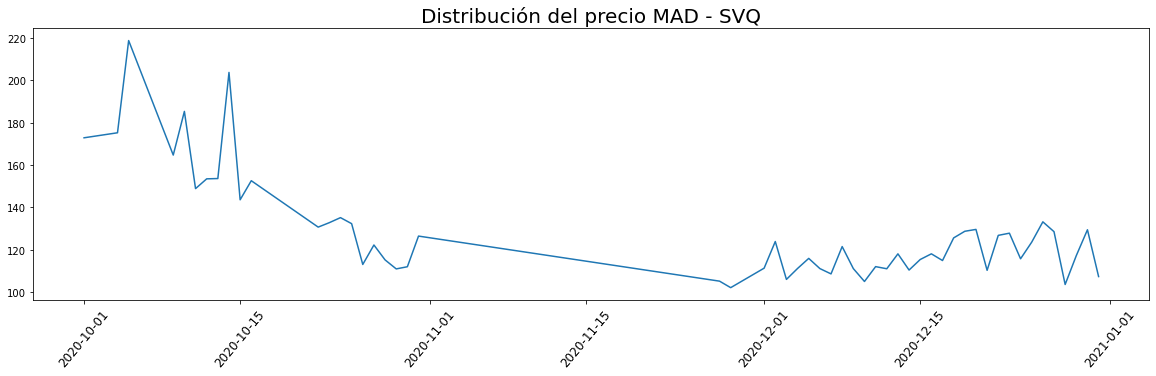

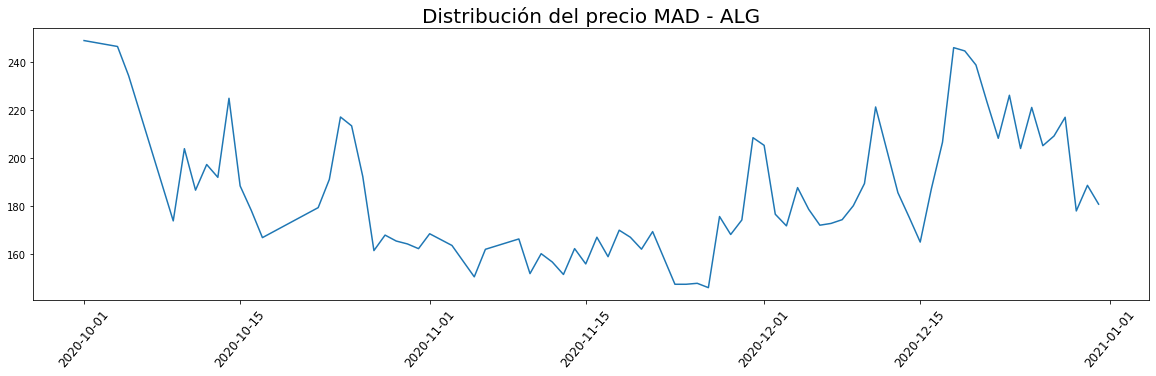

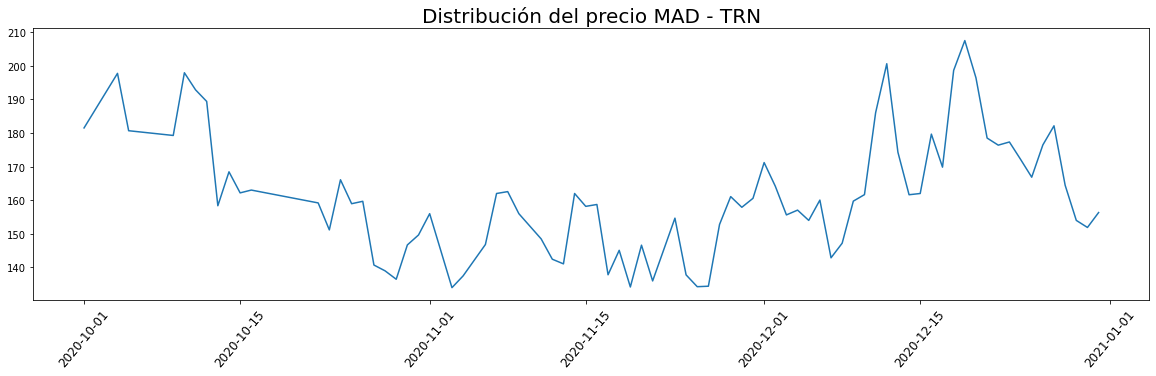

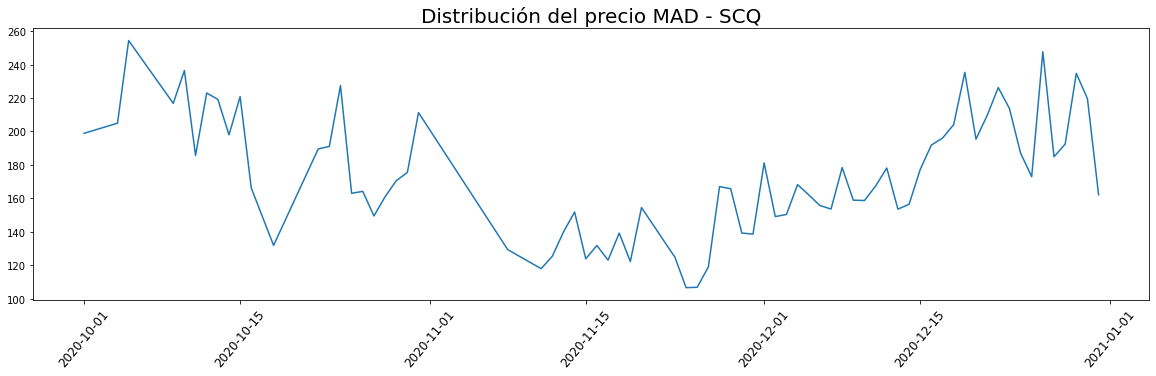

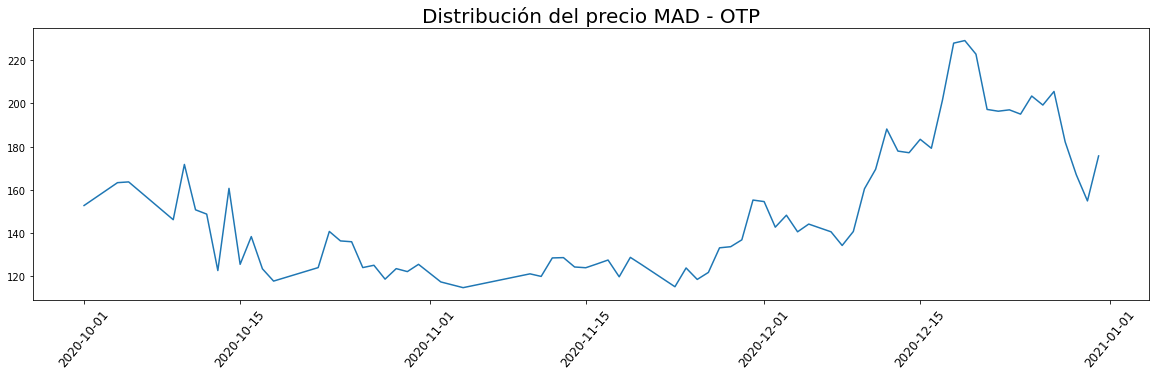

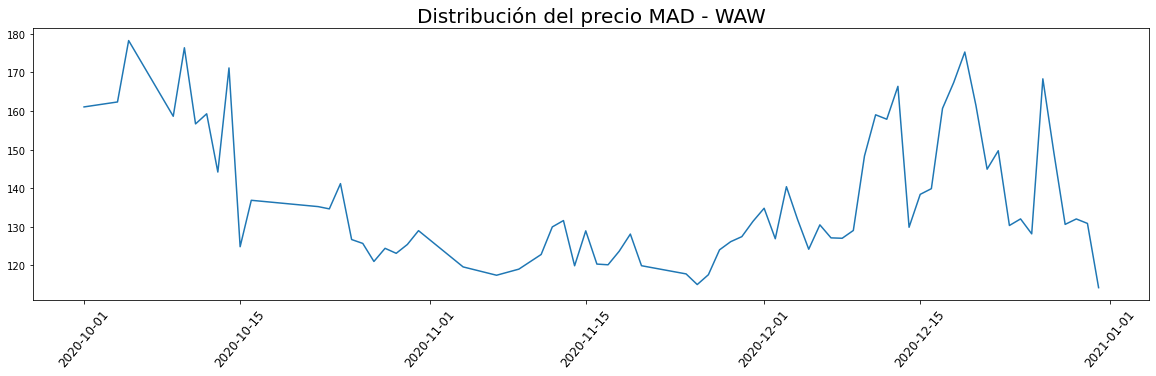

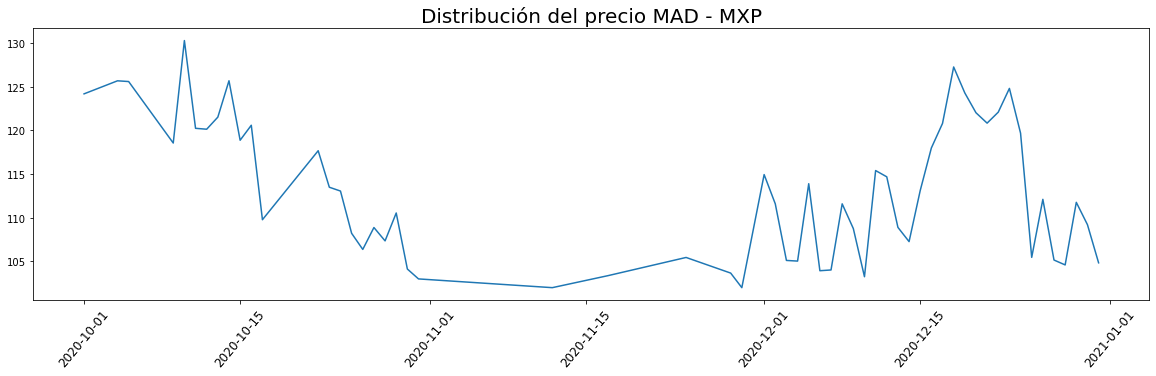

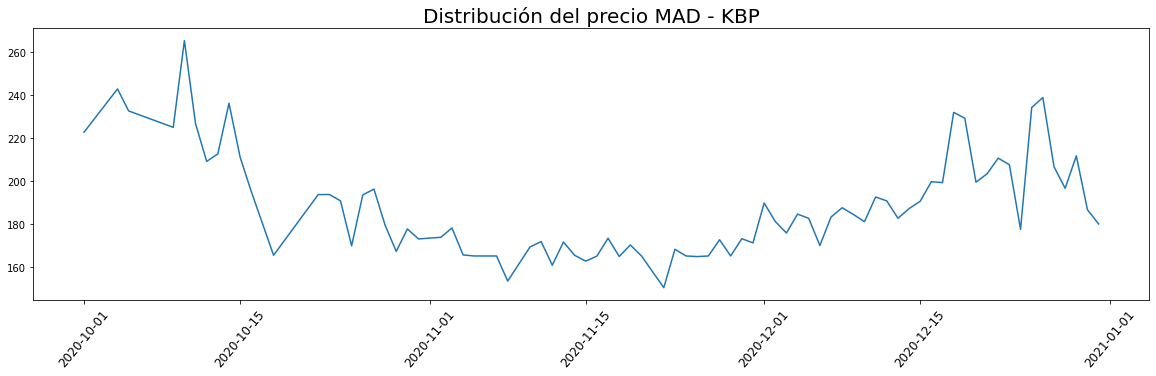

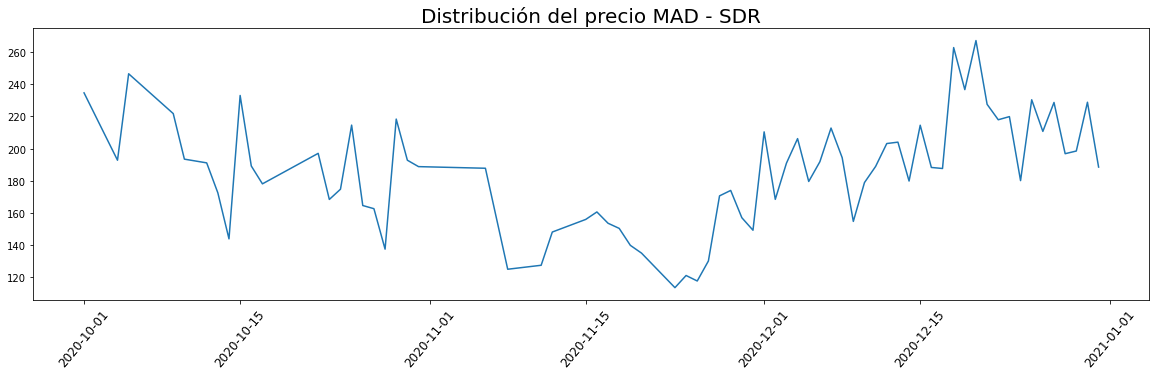

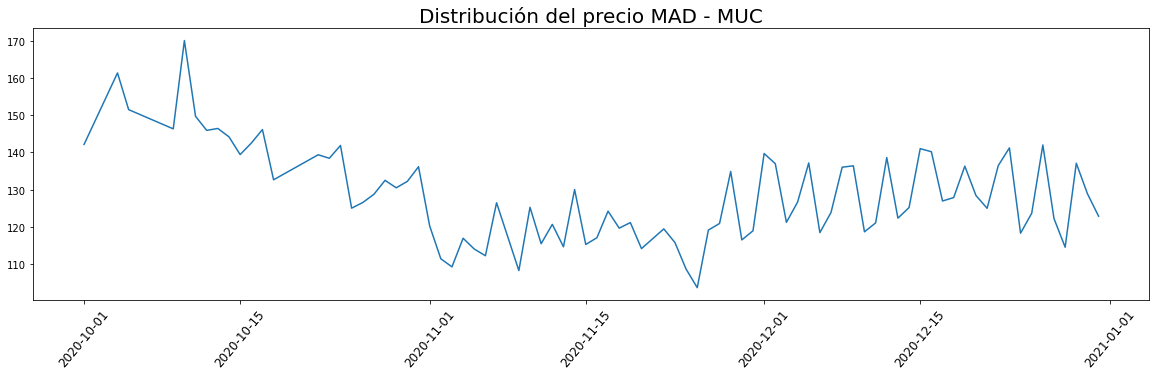

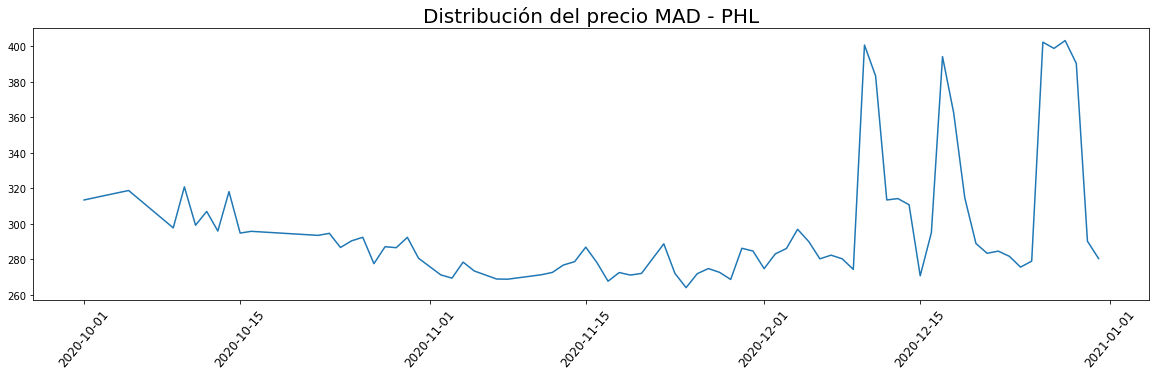

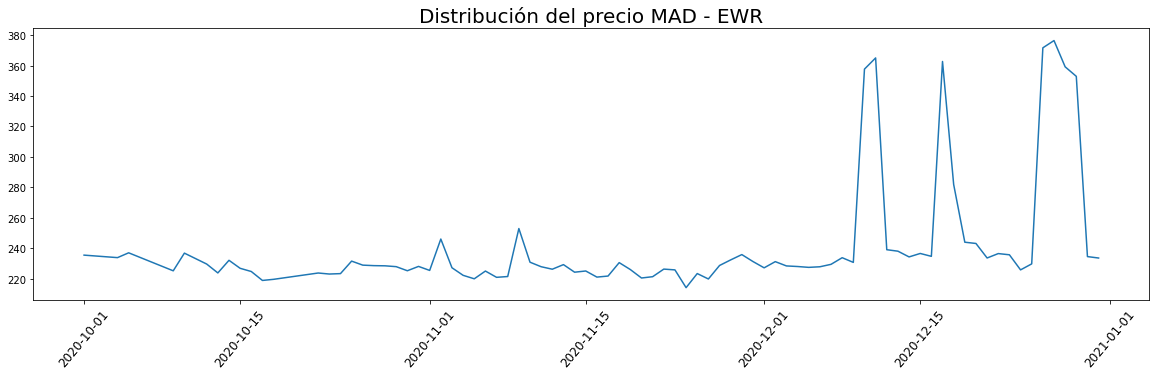

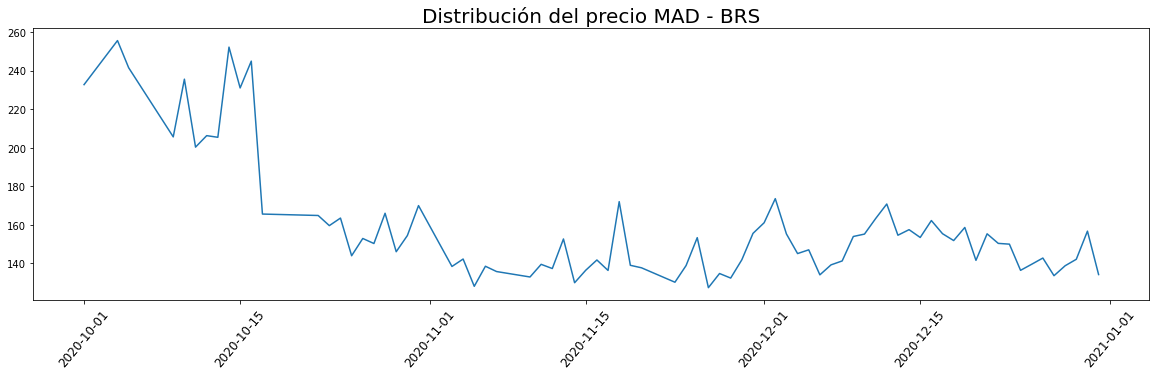

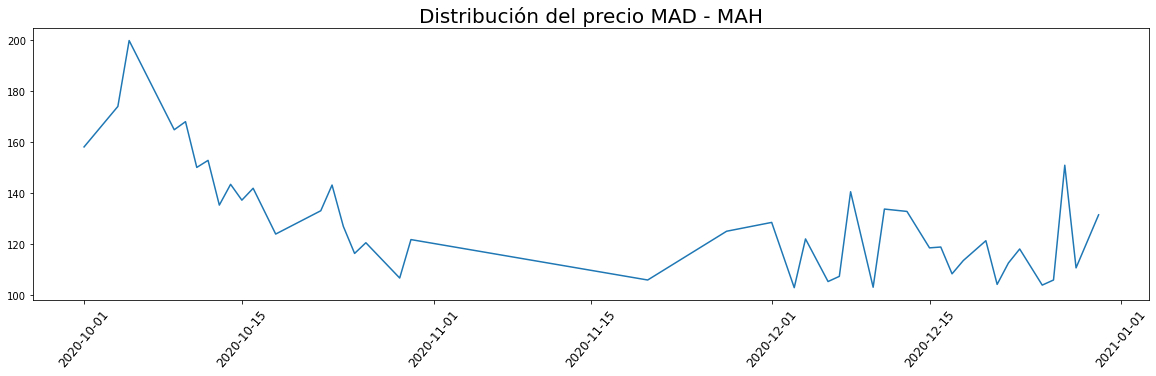

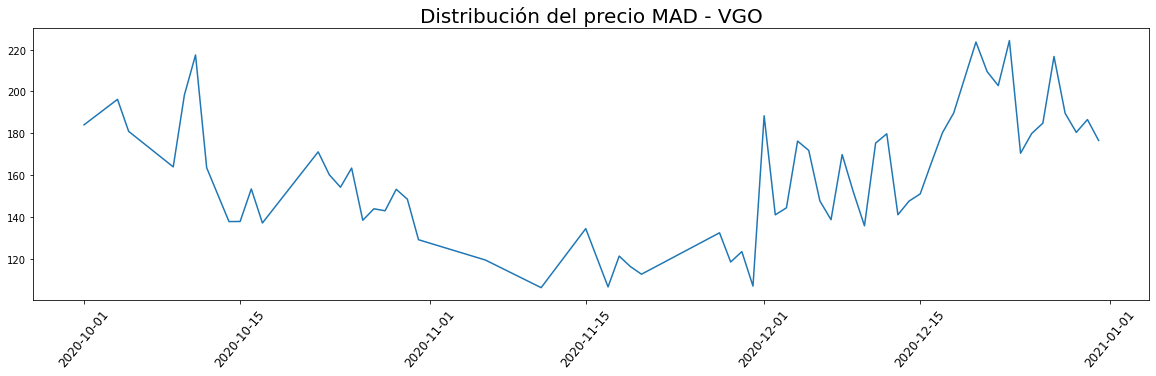

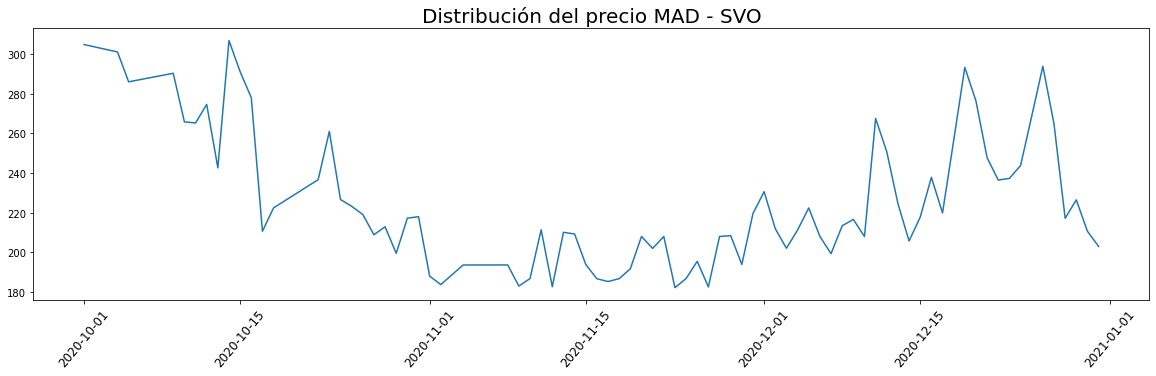

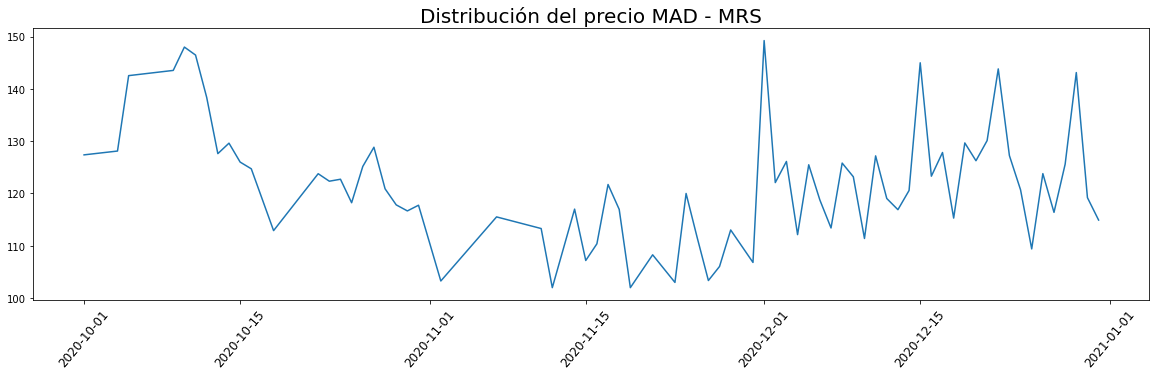

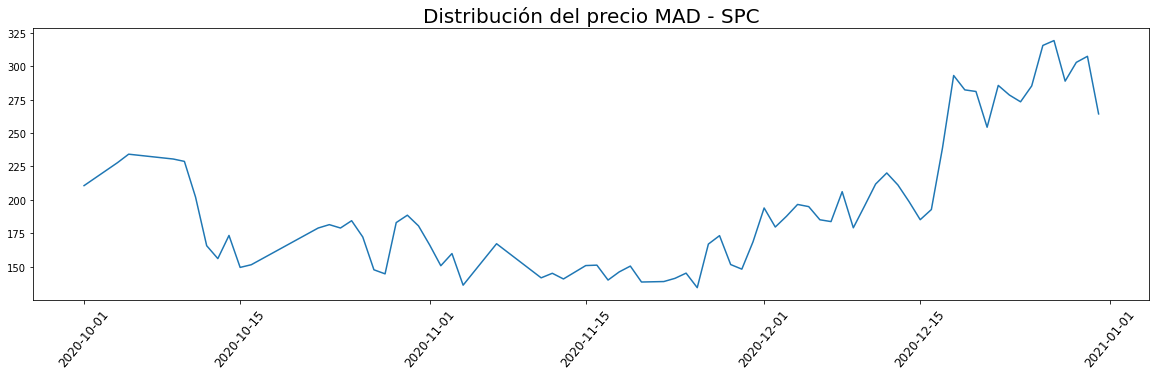

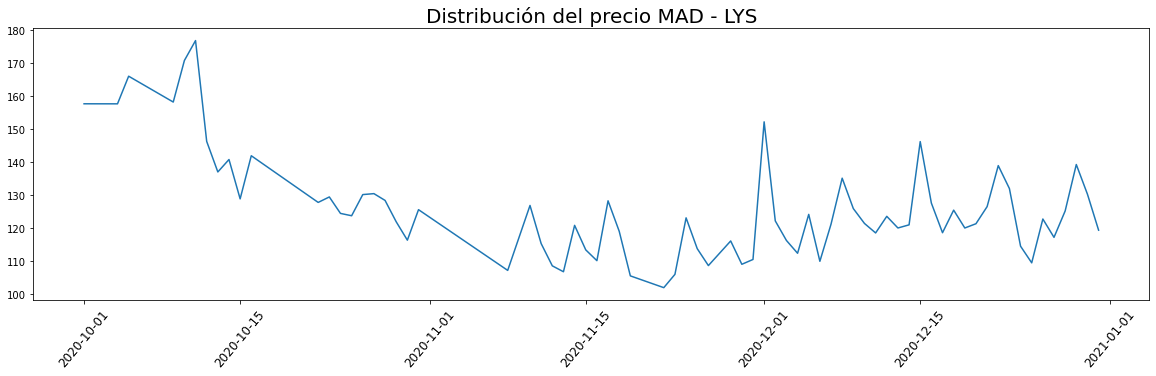

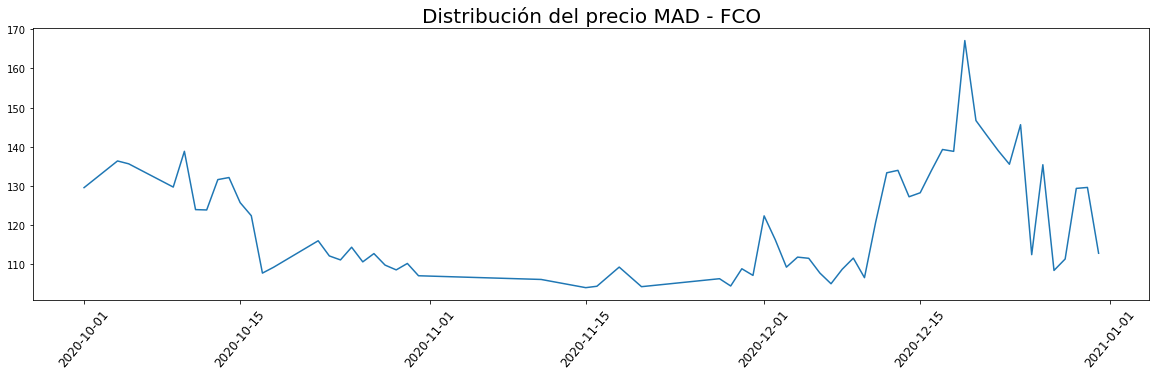

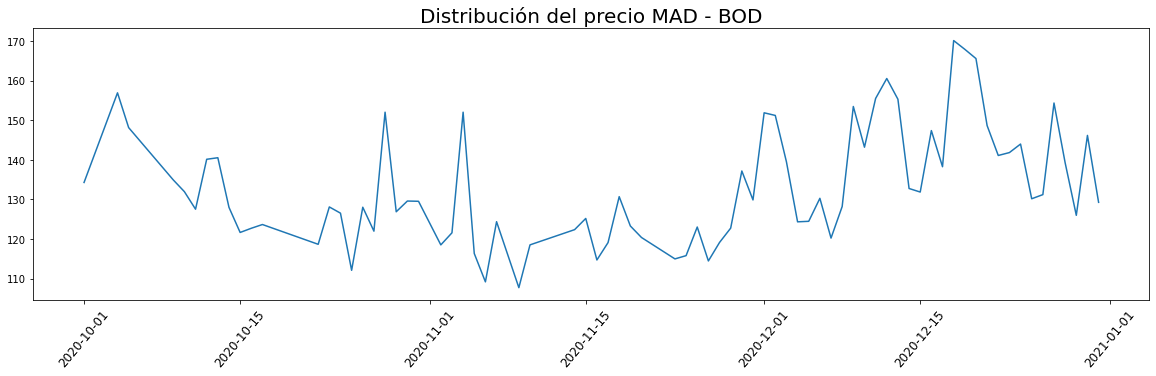

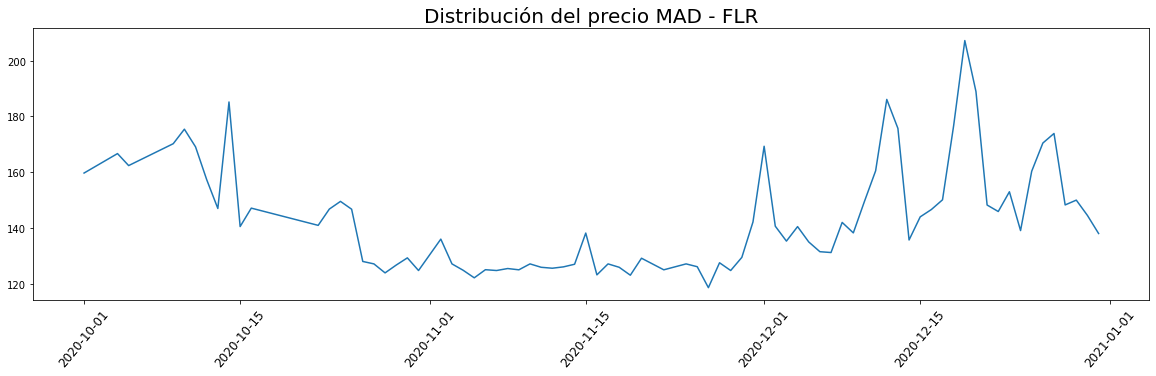

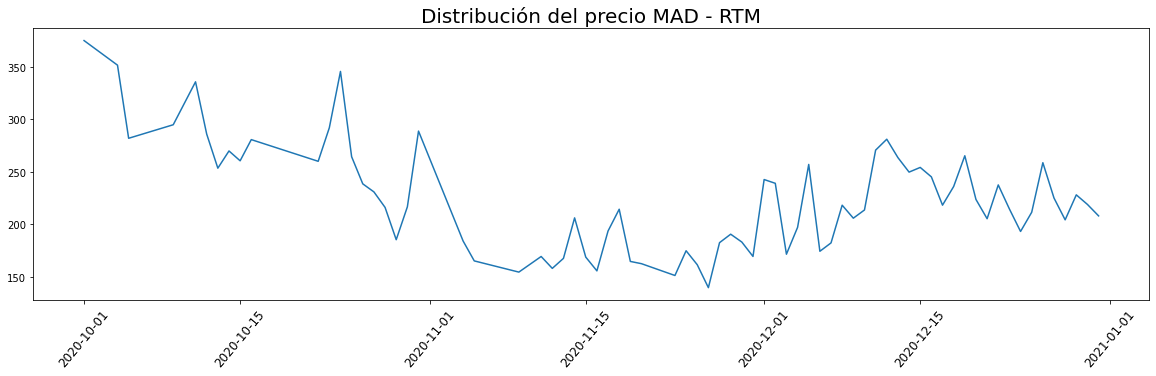

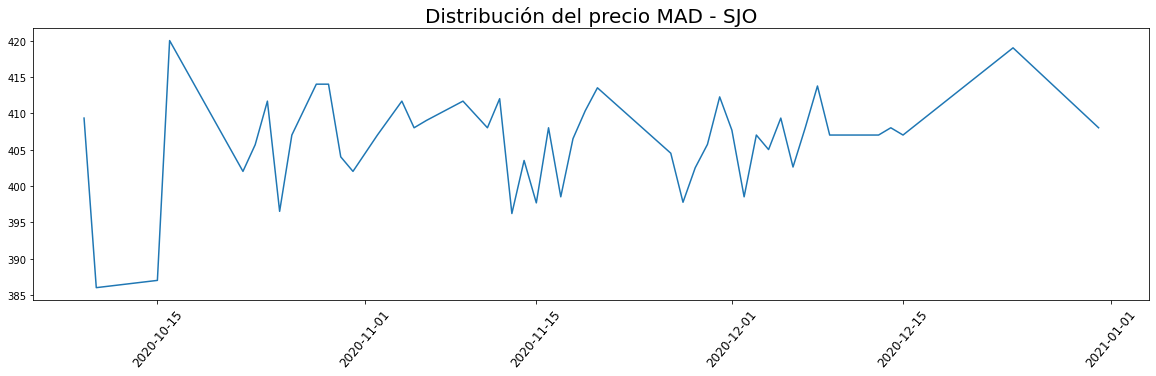

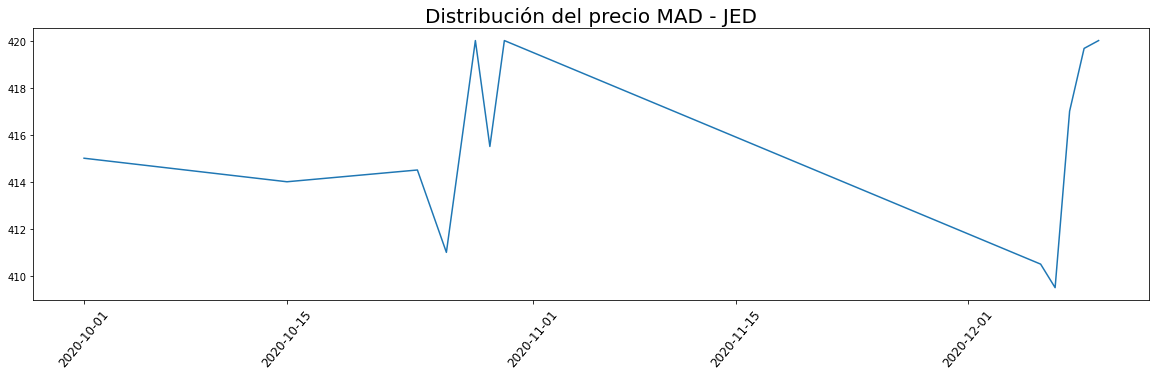

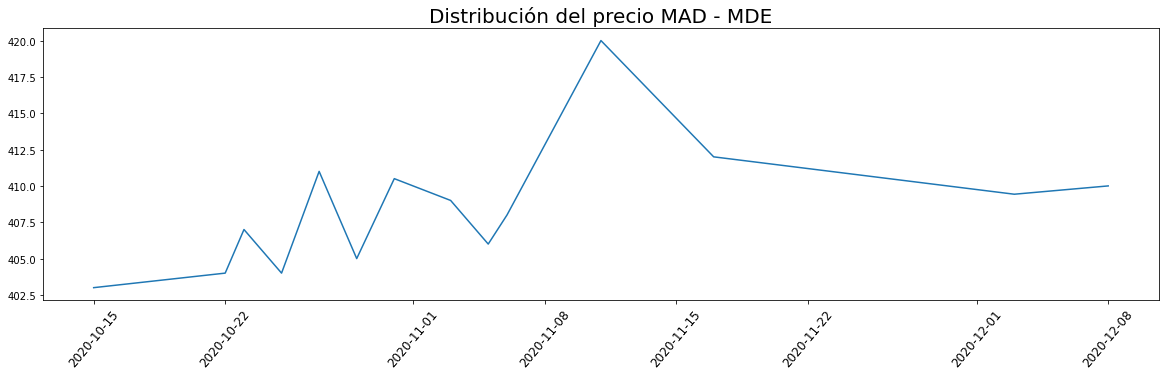

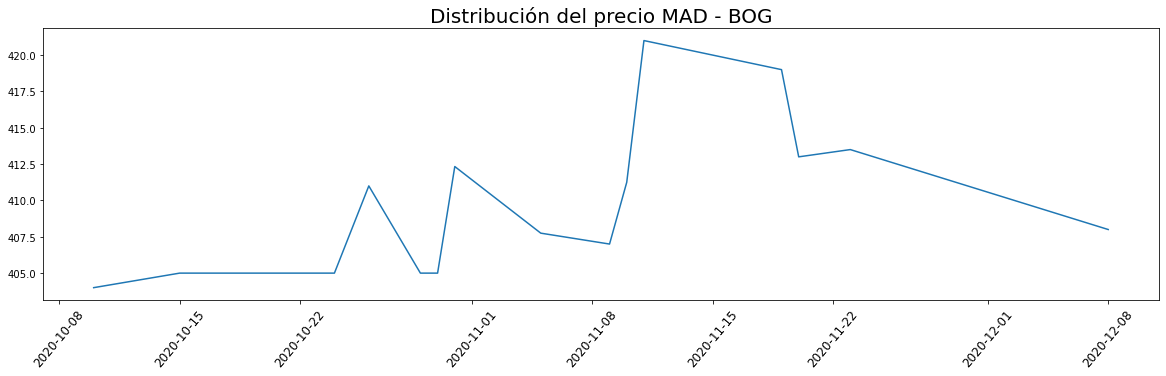

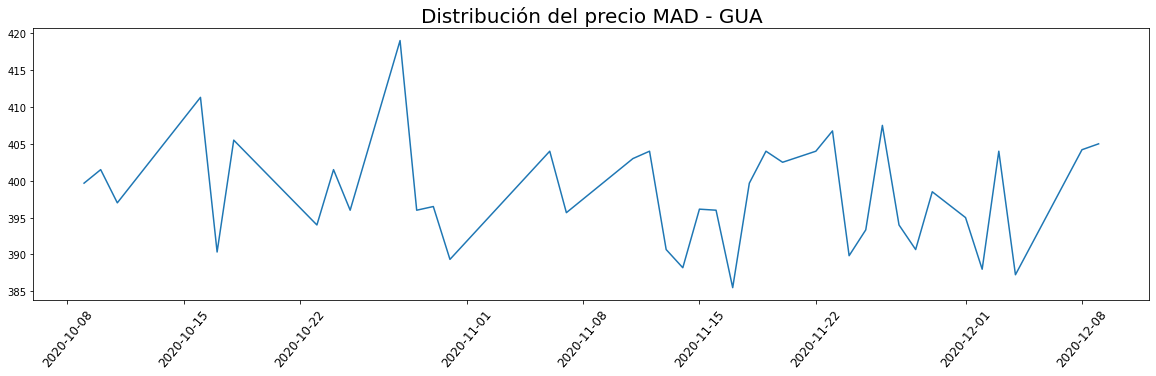

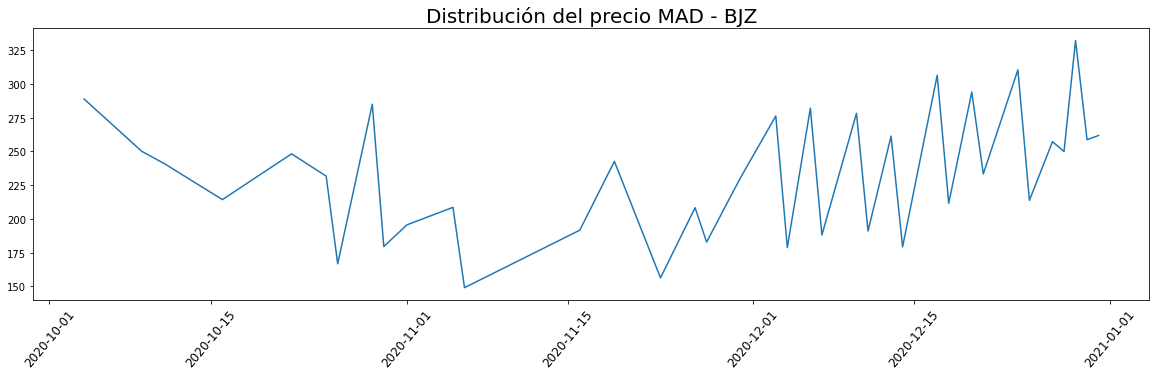

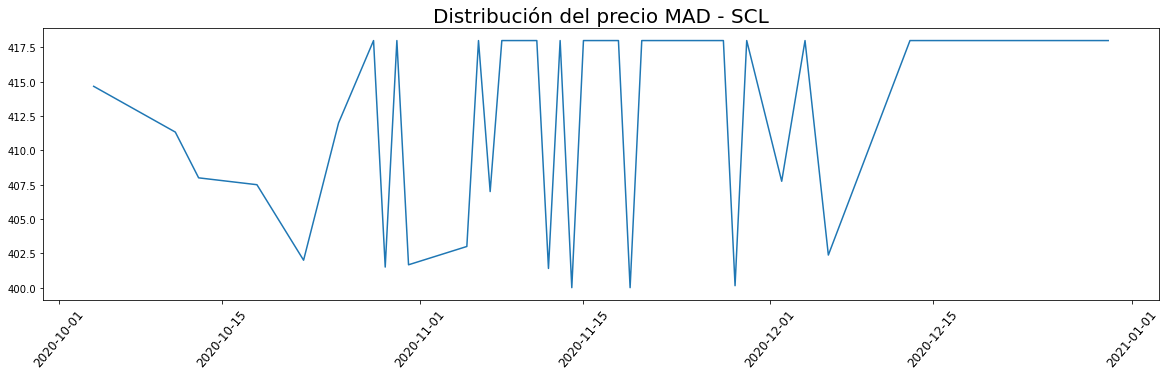

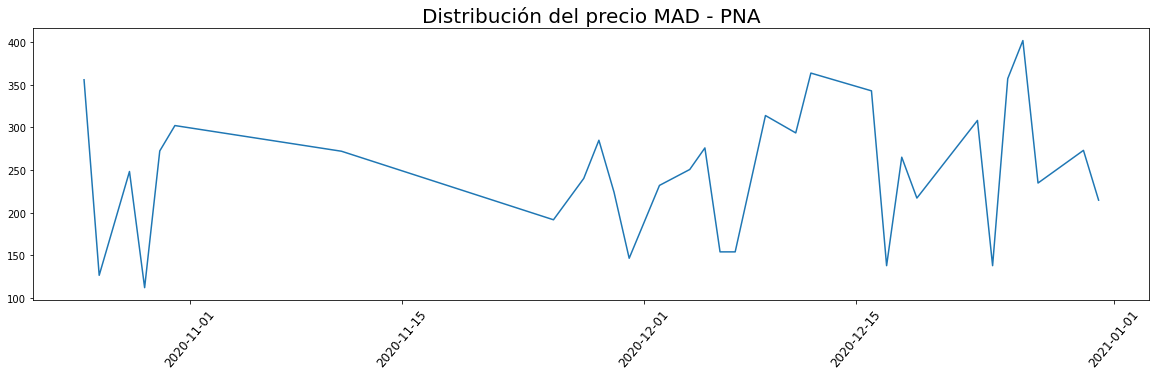

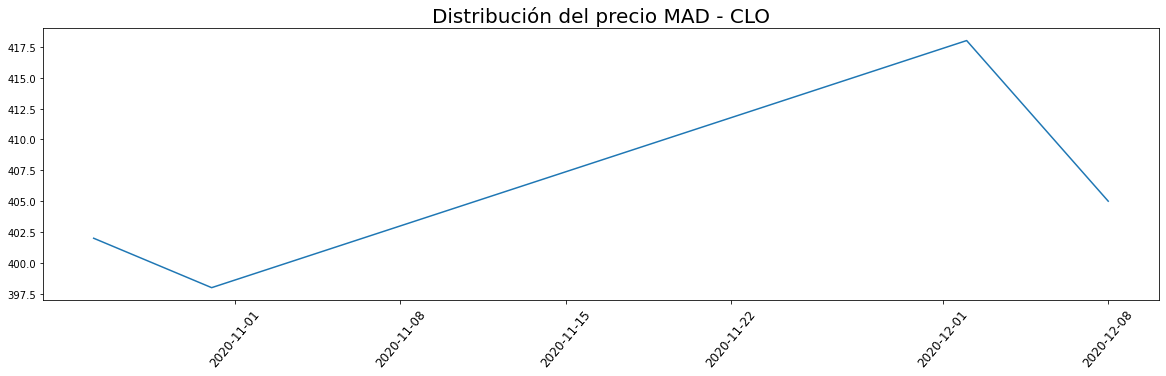

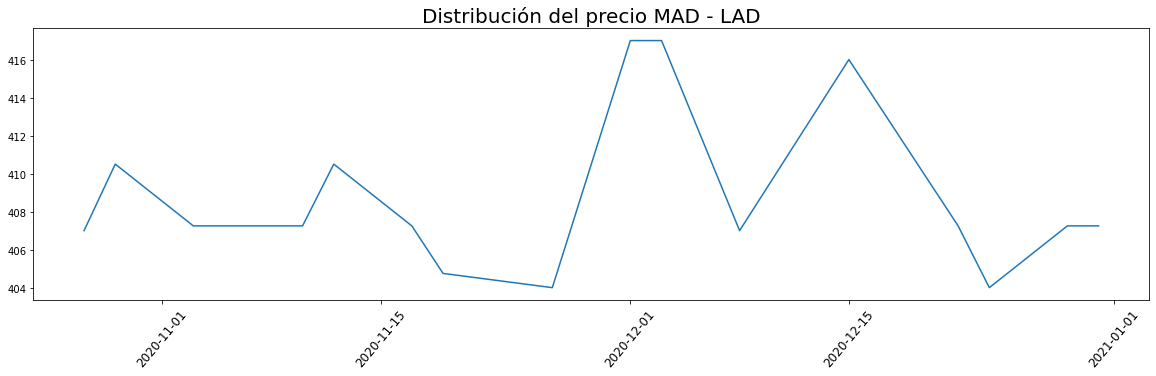

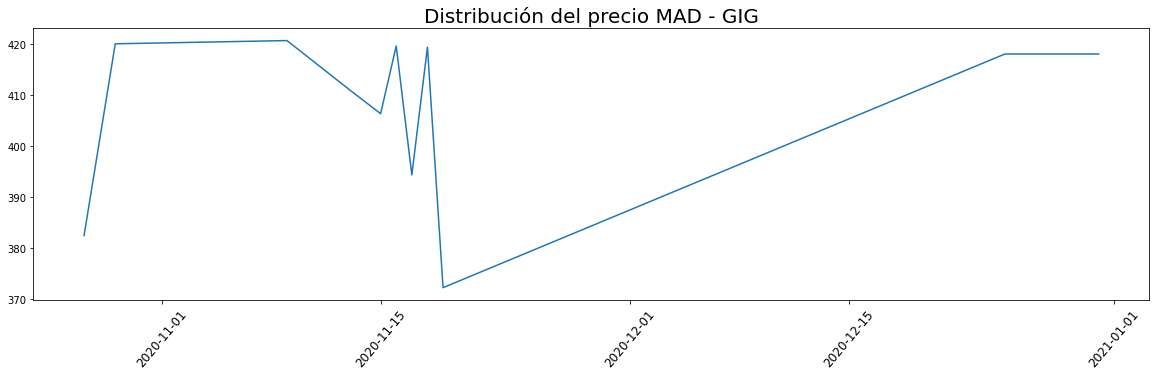

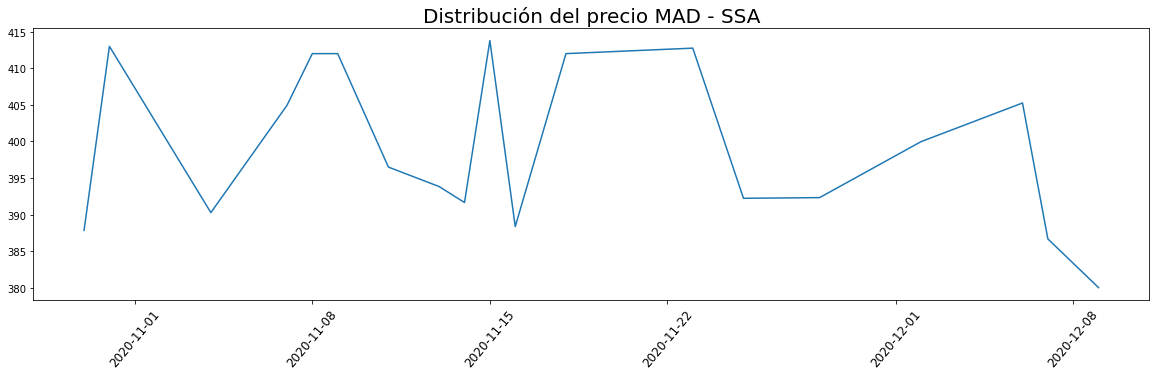

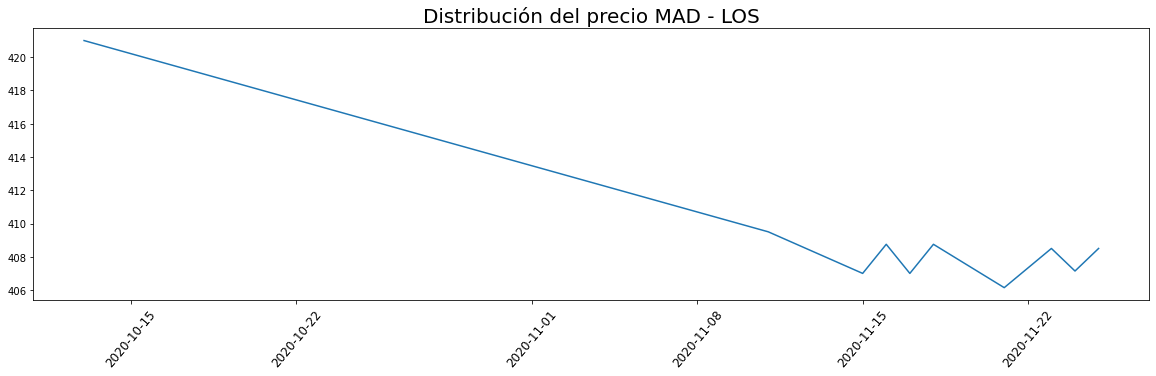

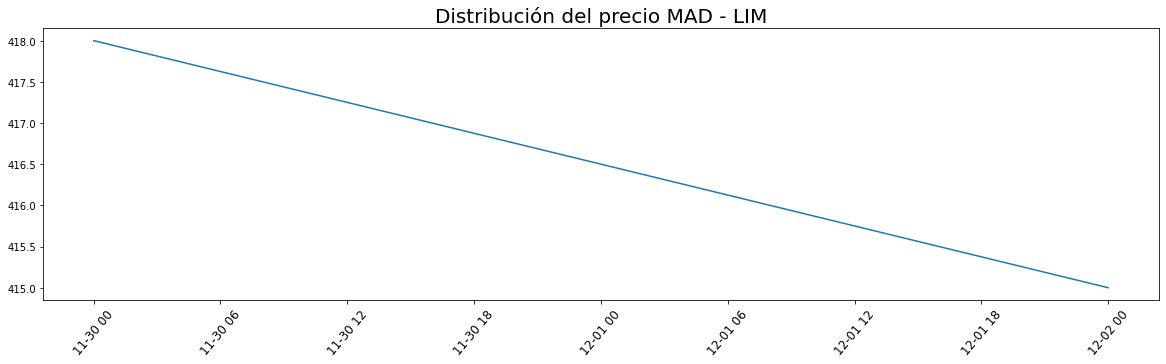

In [25]:
for i in df_mad_sin_outliers['DESTINO'].unique():
    vuelo= df_mad_sin_outliers[df_mad_sin_outliers['DESTINO']==i]
    evolucion = vuelo.sort_values(by="fecha_salida_ida")
    evolucion = evolucion.reset_index(drop=True)
    evolucion = evolucion.set_index('fecha_salida_ida')
    df_evolucion_media = evolucion.groupby('fecha_salida_ida').mean()
    
    fig = plt.subplots(figsize=(20,5))
    plt.subplot(1,1,1)  
    plt.title(f"Distribución del precio MAD - {i}" , fontsize=20)
    plt.xticks(rotation=50, fontsize=12)
    plt.xticks()
    plt.plot(df_evolucion_media["PRECIO"])

As you can see, most routes follow a pattern of falling and rising prices. It can be concluded that the ideal is to make searches to 1 month and a half view to get the best prices. Also the influence of the rise of prices by festive and vacations of Christmas is appraised.

### 4. CONCLUSIONS

It has been proven that there is a pattern of business logic for the price criteria that is of great value for the optimization of the economy flight search algorithm.

This pattern consists of two distinct branches:

- Short distance flights:

- Long distance flights

#### Short distance price pattern

Average price per hectokilometer: 26.68

Dates: month and a half view

Low budget flight destinations: Oporto, Palma de Mallorca, Marsella, Beauvais, Alicante, Valencia, Sevilla, Ibiza, Toulouse, Nantes

Destinations for medium budget flights: Oviedo, Lisboa, Málaga, Bilbao, Barcelona, Vigo, A Coruña, Santiago de Compostela, Badajoz, Ginebra, Menorca, Milán, Santander, Jerez de la Frontera, Almería, Granada-Jaén, Pamplona , San Sebastián, Paris Orly, 

Destinations for high budget flights: Paris Charles de Gaulle, Lyon, Niza, Turín, Alghero, Lourdes(Pirineos).

Days of the week: Wednesday, Thursday and Monday.


#### Long distance price pattern

Average price per hectokilometer: 8.83

Dates: month and a half view

Low budget flight destinations: Zurich, Edimburgo, Eindhoven, Roma Fiumicino, Frankfurt, Venecia Marco Polo, Berlin-Tegel, Cracovia, Varsovia,Londres Gatwick, Londres Heatrow, Milan Linate, Timisoara, Las Palmas de Gran Canaria, Londres Luton, Munich, Milan-Malpensa, Bucarest, Palermo, Praga, Marrakech, Sofía, Düsseldorf, Dublin, Tenerife Norte, Bérgamo, Budapest,Basilea, Cluj-Napoca, Atenas, Viena, Bruselas, Ámsterdam, Lanzarote, Bruselas Sur, Catania, Bolonia, Copenhague, Estocolmo-Arlanda, Mánchester,Luxemburgo, Tánger, Hamburgo, Tenerife Sur, Florencia, Tel Aviv, Fuerteventura, Malta, Brístol, Pisa, Berlin Schönefeld, Roma-Ciampino, Casablanca, La Palma, Estrasburgo, Rabat, Liverpool, Londres Stansted, Helsinki, Rotterdam-La Haya, Moscú, Túnez, Ciudad de Londres, Argel, Boryspil, Orán, Yerba – Zarzis, Estambul, Sabiha Gökçen(Estambul), Moscú-Sheremétievo, Moscú-Domodédovo.


Destinations for medium budget flights:  Miami, JFK Nueva York, Newark (Nueva Jersey), Orlando, Boston, El Cairo, Amman, Filadelfia, Doha, Atlanta.

 
Destinations for high budget flights: Dallas-Fort, Los Ángeles, Dubái, Río de Janeiro, Cancún, Salvador, Guatemala, Kotoka, São Paulo, San José, Santiago de Chile, Colombia, Medellín, Bogotá, Jedda Rey Abdulaziz, Angola, Estado de Lagos, Lima-Callao

Days of the week: Friday, Wednesday and Thursday.

More months' data could be analysed later, to obtain more accurate results on the price pattern, as well as for flights from other origins.